# Project: Ensemble Techniques - Travel Package Purchase Prediction


## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.


## Data Dictionary 

Customer details:

CustomerID: Unique customer ID<BR>
ProdTaken: Product taken flag<BR>
Age: Age of customer<BR>
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)<BR>
CityTier: City tier<BR>
Occupation: Occupation of customer<BR>
Gender: Gender of customer<BR>
NumberOfPersonVisited: Total number of person came with customer<BR>
PreferredPropertyStar: Preferred hotel property rating by customer<BR>
MaritalStatus: Marital status of customer<BR>
NumberOfTrips: Average number of the trip in a year by customer<BR>
Passport: The customer has passport or not<BR>
OwnCar: Customers owns a car flag<BR>
NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer<BR>
Designation: Designation of the customer in the current organization<BR>
MonthlyIncome: Gross monthly income of the customer<BR>
    
Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfactory score<BR>
ProductPitched: Product pitched by a salesperson<BR>
NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch<BR>
DurationOfPitch: Duration of the pitch by a salesman to customer<BR>

## Index

- <a href = #link1>Import Libraries and Load data </a>


- <a href = #link2>Overview of the dataset</a> 
        

- <a href = #link3>EDA</a> 
     - <a href = #link31>Univariant Analysis</a> 
     - <a href = #link32>BiVariant Analysis</a> 
     - <a href = #link33>Correlation Matrix</a> 
     - <a href = #link34>Customer Profile of the different packages</a> 
    


- <a href = #link4>Illustrate the insights based on EDA</a> 


- <a href = #link5>Data Pre-processing</a>
     - <a href = #link51>Outlier detection</a>
     - <a href = #link52>Missing value Treatment</a>
     - <a href = #link53>Prepare data for modeling</a>
     - <a href = #link54>Feature Engineering</a>
    
     
- <a href = #link6>Split the dataset</a>


- <a href = #link7>Model building - Bagging </a> 
     - <a href = #link71>Decision Tree</a>
     - <a href = #link72>Bagging Classifier</a>
     - <a href = #link73>Random Forest Classifier</a>


- <a href = #link8>Model performance improvement - Bagging</a>
     - <a href = #link81>which metric is right</a>
     - <a href = #link82>Comments on Model performance</a>
     - <a href = #link83>Can model performance be improved?</a>
     - <a href = #link84>Model Performance Improvement</a>
    

- <a href = #link9>Model building - Boosting </a>
    - <a href = #link91>Adaboost Classifier
    - <a href = #link92>Gradient boost Classifier
    



- <a href = #link7>Stacking Model</a>


- <a href = #link8>Business Recommendations</a>

## <a id = "link1"></a> Import Libraries and Load data

**Importing libraries we need.**

In [4]:
!pip install xgboost  # install xgboost

In [5]:
conda install py-xgboost  #install py-xgboost 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
##  Import required libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# increase cell width and height 
# from IPython.core.display import HTML, display
# display(HTML("<style>div.output_scroll {width:100%; height:50em}<style>"))

In [7]:
tourismDf = pd.read_excel (r'Tourism.xlsx', sheet_name='Tourism')  # load data from excel

## <a id = "link2"></a>Overview of the dataset

In [8]:
tourismDf.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
tourismDf.info()   # print data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [10]:
tourismDf.dtypes

CustomerID                   int64
ProdTaken                    int64
Age                        float64
TypeofContact               object
CityTier                     int64
DurationOfPitch            float64
Occupation                  object
Gender                      object
NumberOfPersonVisited        int64
NumberOfFollowups          float64
ProductPitched              object
PreferredPropertyStar      float64
MaritalStatus               object
NumberOfTrips              float64
Passport                     int64
PitchSatisfactionScore       int64
OwnCar                       int64
NumberOfChildrenVisited    float64
Designation                 object
MonthlyIncome              float64
dtype: object

**Convert relevant columns to categorical columnms.**

In [11]:
# object type columns are converted to categorical datatype

for feature in tourismDf.columns: # Loop through all columns in the dataframe
    if tourismDf[feature].dtype == 'object': # Only apply for columns with categorical strings
        tourismDf[feature] = pd.Categorical(tourismDf[feature])# Convert object datatype to categorical datatype


In [12]:
# Few columns which have categorical data are of datatype int, float. so such columns are converted to categorical datatype.


cat_cols = ['ProdTaken','CityTier','PreferredPropertyStar','Passport','OwnCar','Gender'] # columns which are supposed to be of category datatype
for feature in cat_cols: # Loop through items in the list
    tourismDf[feature] = pd.Categorical(tourismDf[feature])# Convert column datatype to categorical datatype
tourismDf.head(5)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
tourismDf.dtypes # check datatypes after converting all relevant columns into categorical datatype.

CustomerID                    int64
ProdTaken                  category
Age                         float64
TypeofContact              category
CityTier                   category
DurationOfPitch             float64
Occupation                 category
Gender                     category
NumberOfPersonVisited         int64
NumberOfFollowups           float64
ProductPitched             category
PreferredPropertyStar      category
MaritalStatus              category
NumberOfTrips               float64
Passport                   category
PitchSatisfactionScore        int64
OwnCar                     category
NumberOfChildrenVisited     float64
Designation                category
MonthlyIncome               float64
dtype: object

In [14]:
tourismDf.describe()

,CustomerID,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4662.000000,4637.000000,4888.000000,4843.000000,4748.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,37.622265,15.490835,2.905074,3.708445,3.236521,3.078151,1.187267,23619.853491
std,1411.188388,9.316387,8.519643,0.724891,1.002509,1.849019,1.365792,0.857861,5380.698361
min,200000.000000,18.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,201221.750000,31.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,20346.000000
50%,202443.500000,36.000000,13.000000,3.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,203665.250000,44.000000,20.000000,3.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,204887.000000,61.000000,127.000000,5.000000,6.000000,22.000000,5.000000,3.000000,98678.000000


**Check missing values.**

In [15]:
tourismDf.isna().sum().sort_values()  # check for null values

CustomerID                   0
ProdTaken                    0
OwnCar                       0
CityTier                     0
PitchSatisfactionScore       0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
Designation                  0
ProductPitched               0
MaritalStatus                0
Passport                     0
TypeofContact               25
PreferredPropertyStar       26
NumberOfFollowups           45
NumberOfChildrenVisited     66
NumberOfTrips              140
Age                        226
MonthlyIncome              233
DurationOfPitch            251
dtype: int64

In [16]:
# check value counts for each categorical feature.
for feature in tourismDf.columns:
    if tourismDf[feature].dtype.name == 'category':
        print('---------------------------------')
        print(tourismDf[feature].value_counts())
        print('---------------------------------')        

---------------------------------
0    3968
1     920
Name: ProdTaken, dtype: int64
---------------------------------
---------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
---------------------------------
---------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
---------------------------------
---------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
---------------------------------
---------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
---------------------------------
---------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
---------------------------------
---------------------------------
3.0    2993
5.0     956
4.0  

In [17]:
# noticed that Female has typo error in few rows. so that is handled by replacing 'Fe Male' as 'Female'.

tourismDf = tourismDf.replace({'Gender':{'Fe Male':'Female','Female':'Female','Male':'Male'}})

In [18]:
#check the Gender value counts to make sure typo errors are removed.
tourismDf['Gender'] = pd.Categorical(tourismDf['Gender'])

print(tourismDf['Gender'].value_counts())

print(tourismDf['Gender'].dtype)

Male      2916
Female    1972
Name: Gender, dtype: int64
category


## <a id = "link3"></a>EDA

**Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive - 8M**

## <a id = "link31"></a>Univariant analysis

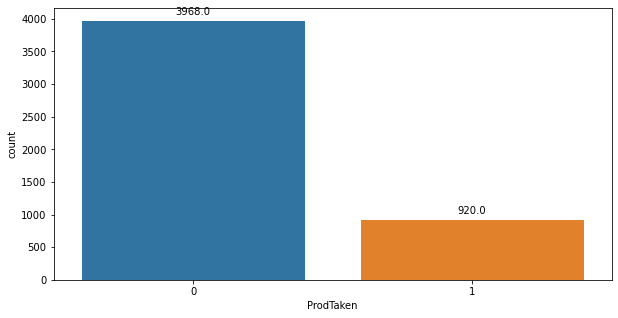

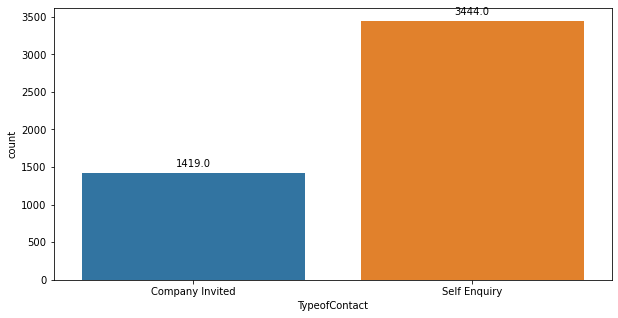

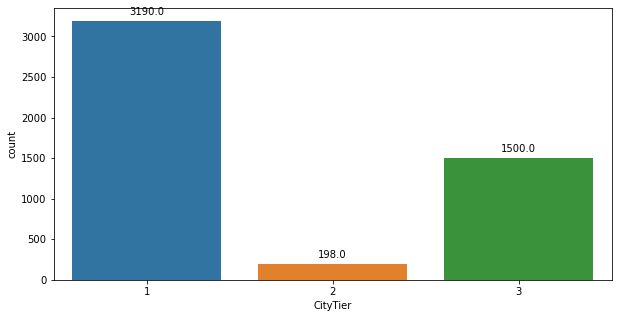

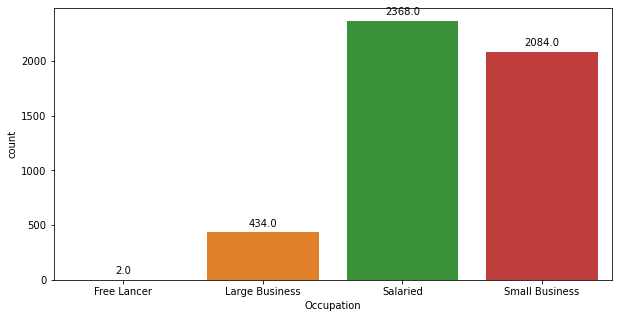

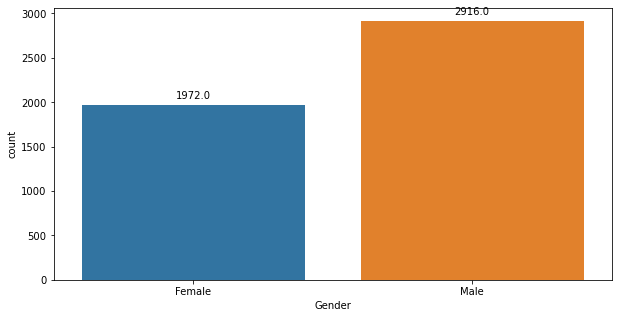

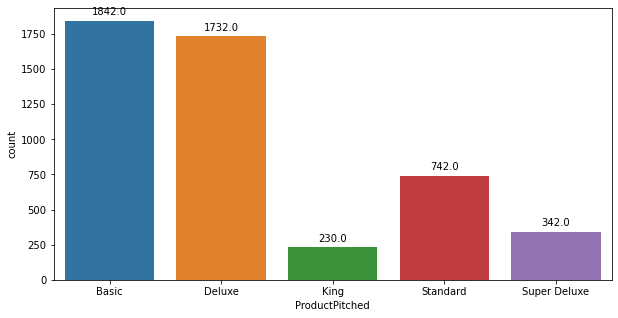

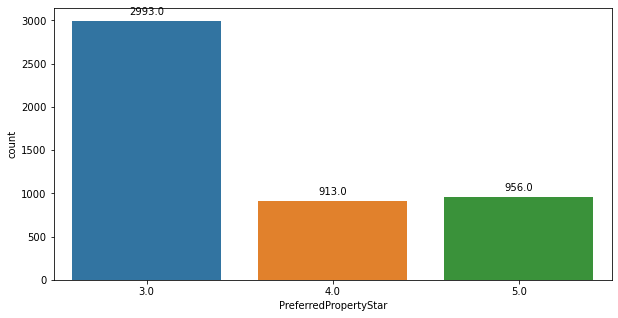

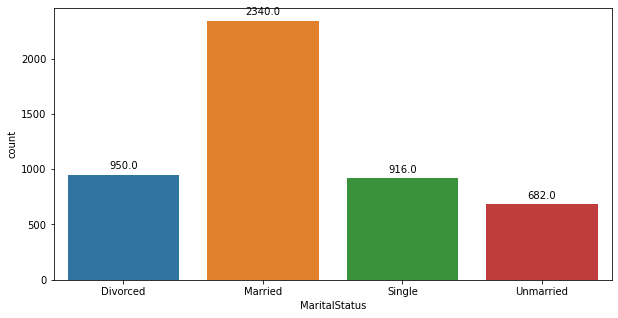

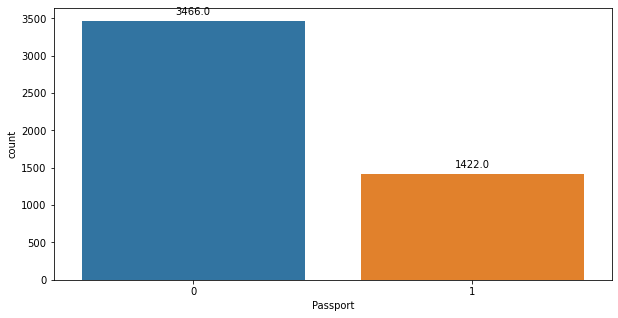

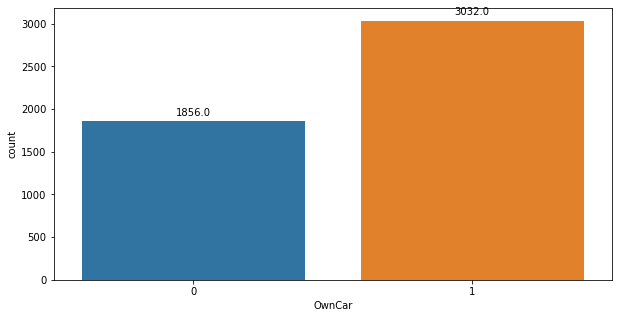

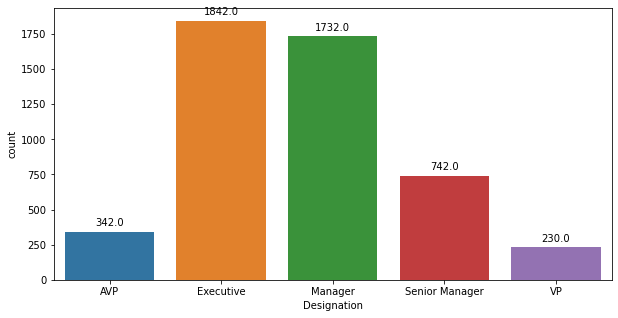

In [19]:
# Generate counts plot graphs for categorical features in the data.

for feature in tourismDf.columns:
    if tourismDf[feature].dtype.name == 'category':
        plt.figure(figsize=(10,5))
        g = sns.countplot(tourismDf[feature])
        for p in g.patches:
            g.annotate(format(p.get_height(), '.1f'),    # display count on top of bar in the graph. 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
            


### Insights from univariant count plots

1. There are more customers who contacted on self-enquiry rather than company invited. which means advertising is reaching the audience.
2.  More number of customers came from CityTier 1.
3.  Majority of customers are Salaried people.
4.  Suprisingly most preferred property start is 3. might be people compromised quality for cost. 
5.  Married people are more among the customers.
6.  Majority of customers have no passport so travel packages can more concentrate on places with in the country.

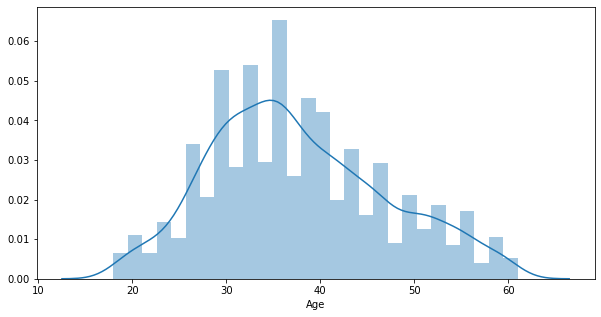

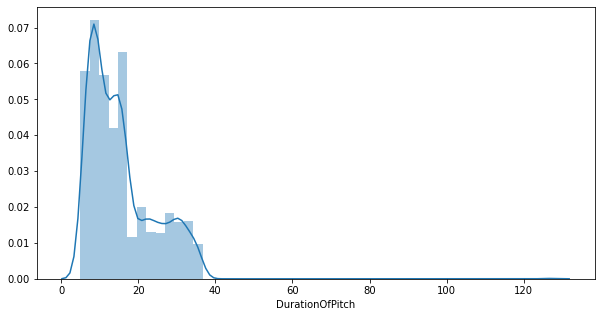

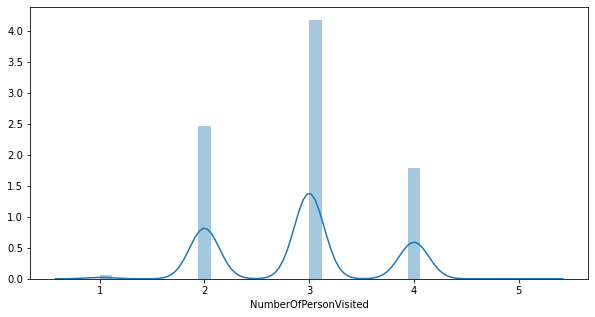

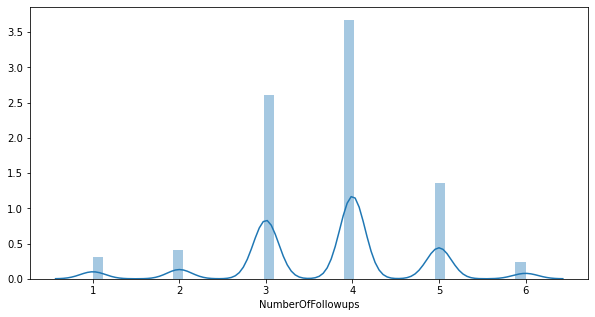

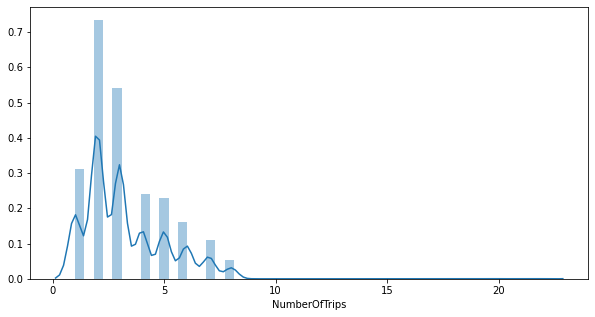

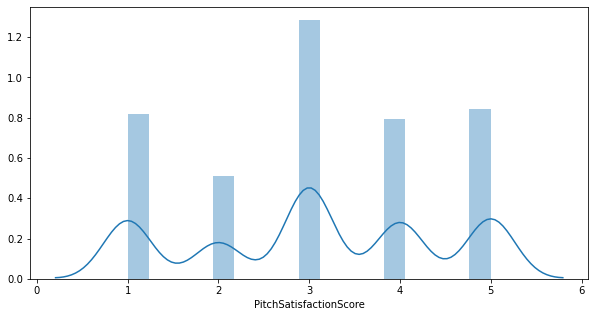

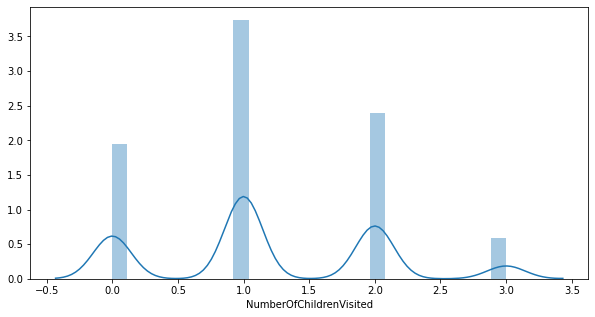

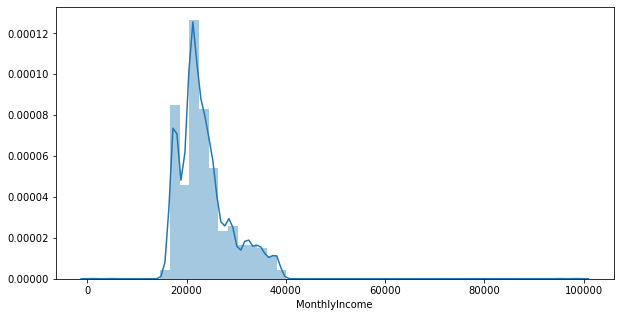

In [20]:
# Generate distplot graphs for features having numeric data.

for feature in tourismDf.columns[1:]:
    if tourismDf[feature].dtype.name != 'category':
        plt.figure(figsize=(10,5))
        g = sns.distplot(tourismDf[feature])

###  Insights from Univariant dist plots
1. Majority of customers age is between 30 and 40 yrs.
2. Duration of pitch is left skewed. means most of pitch last for less duration that is between (0-20).
3. Majority of customers salary is between 20000  to 25000 apprx.


## <a id = "link32"></a>BiVariant Analysis

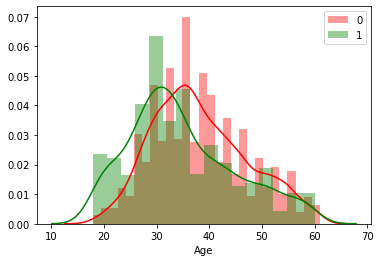

In [21]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['Age']>0)]['Age'],color='r',label=0)
sns.distplot(tourismDf[(tourismDf['ProdTaken']==1) & (tourismDf['Age']>0)]['Age'],color='g',label=1)
plt.legend()
plt.show()

# Majority of Customer's age  who accepted the Product is around 20 - 30 yrs.
# Majority of Customer's age  who accepted the Product is around 30 - 40 yrs.


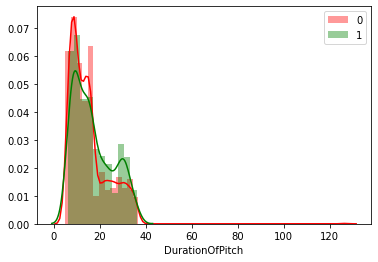

In [22]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['DurationOfPitch']>0)]['DurationOfPitch'],color='r',label=0)
sns.distplot(tourismDf[  (tourismDf['ProdTaken']==1)  & (tourismDf['DurationOfPitch']>0)   ]['DurationOfPitch'],color='g',label=1)
plt.legend()
plt.show()

# ProdTaken =0 and ProdTaken =1 trends behave same with DurationOfPitch.

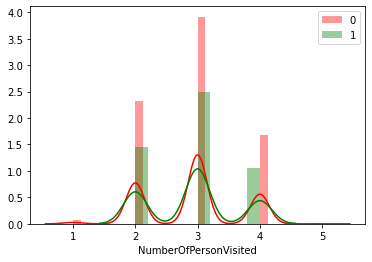

In [23]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['NumberOfPersonVisited']>0)]['NumberOfPersonVisited'],color='r',label=0)
sns.distplot(tourismDf[(tourismDf['ProdTaken']==1) & (tourismDf['NumberOfPersonVisited']>0)]['NumberOfPersonVisited'],color='g',label=1)
plt.legend()
plt.show()

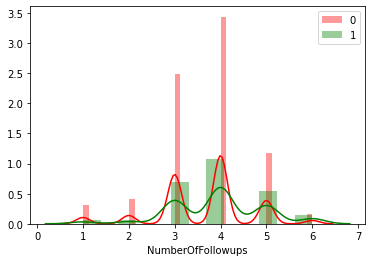

In [24]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['NumberOfFollowups']>0)]['NumberOfFollowups'],color='r',label=0)
sns.distplot(tourismDf[(tourismDf['ProdTaken']==1) & (tourismDf['NumberOfFollowups']>0)]['NumberOfFollowups'],color='g',label=1)
plt.legend()
plt.show()

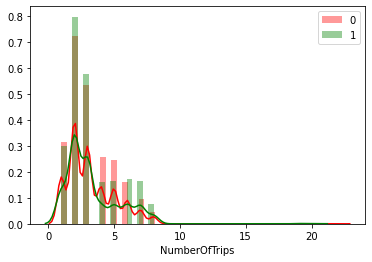

In [25]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['NumberOfTrips']>0)]['NumberOfTrips'],color='r',label=0)
sns.distplot(tourismDf[(tourismDf['ProdTaken']==1) & (tourismDf['NumberOfTrips']>0)]['NumberOfTrips'],color='g',label=1)
plt.legend()
plt.show()

# Customers who have accepted the Prod have taken more number of trips.

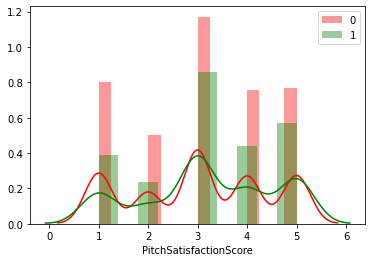

In [26]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['PitchSatisfactionScore']>0)]['PitchSatisfactionScore'],color='r',label=0)
sns.distplot(tourismDf[(tourismDf['ProdTaken']==1) & (tourismDf['PitchSatisfactionScore']>0)]['PitchSatisfactionScore'],color='g',label=1)
plt.legend()
plt.show()

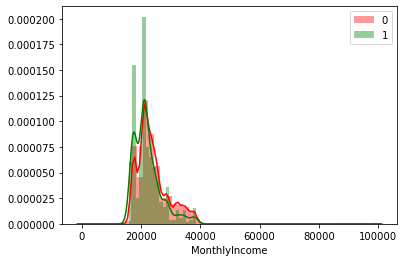

In [27]:
sns.distplot(tourismDf[(tourismDf['ProdTaken']==0) & (tourismDf['MonthlyIncome']>0)]['MonthlyIncome'],color='r',label=0)
sns.distplot(tourismDf[  (tourismDf['ProdTaken']==1)  & (tourismDf['MonthlyIncome']>0)   ]['MonthlyIncome'],color='g',label=1)
plt.legend()
plt.show()

# Majority of customers with Monthly income between 20000 - 30000 accepted the Prod.

cross tab between TypeofContact and ProdTaken
ProdTaken           0    1
TypeofContact             
Company Invited  1109  310
Self Enquiry     2837  607
-----------------------------------------------
cross tab percentages between TypeofContact and ProdTaken
ProdTaken               0         1
TypeofContact                      
Company Invited  0.781536  0.218464
Self Enquiry     0.823751  0.176249


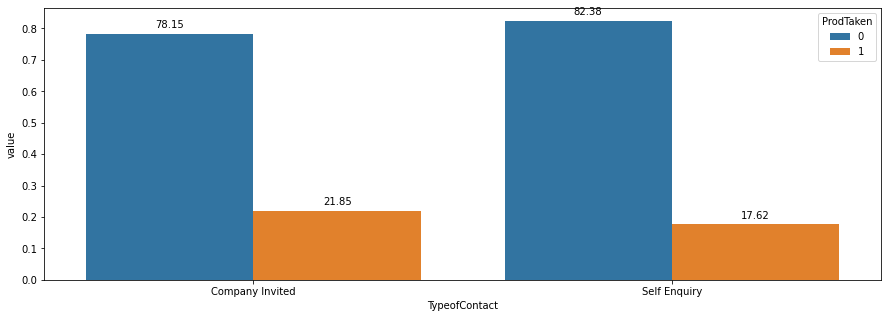

In [28]:
print( 'cross tab between TypeofContact and ProdTaken' )
typeofContact_df = pd.crosstab(tourismDf['TypeofContact'],tourismDf['ProdTaken'],normalize=False)
print(typeofContact_df)
print('-----------------------------------------------')
print( 'cross tab percentages between TypeofContact and ProdTaken' )
typeofContact_df = pd.crosstab(tourismDf['TypeofContact'],tourismDf['ProdTaken'],normalize='index')
print(typeofContact_df)


typeofContact_df = typeofContact_df.stack().reset_index().rename(columns={0:'value'})  # reorganizing data to facilitate barplot. 


plt.figure(figsize=(15,5)) 
g = sns.barplot(x=typeofContact_df['TypeofContact'],y=typeofContact_df['value'],hue='ProdTaken',data=typeofContact_df)
for p in g.patches:
    g.annotate(format(p.get_height()*100, '.2f'),   # print percentages on top of bar in the chart.
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    
# Insights
# Comparitively a slight high percentage of company invited customers accepted Prod when compared to self_enquired.

cross tab between Occupation and ProdTaken
ProdTaken          0    1
Occupation               
Free Lancer        0    2
Large Business   314  120
Salaried        1954  414
Small Business  1700  384
-----------------------------------------------
cross tab percentages between Occupation and ProdTaken
     TypeofContact ProdTaken     value
0  Company Invited         0  0.781536
1  Company Invited         1  0.218464
2     Self Enquiry         0  0.823751
3     Self Enquiry         1  0.176249


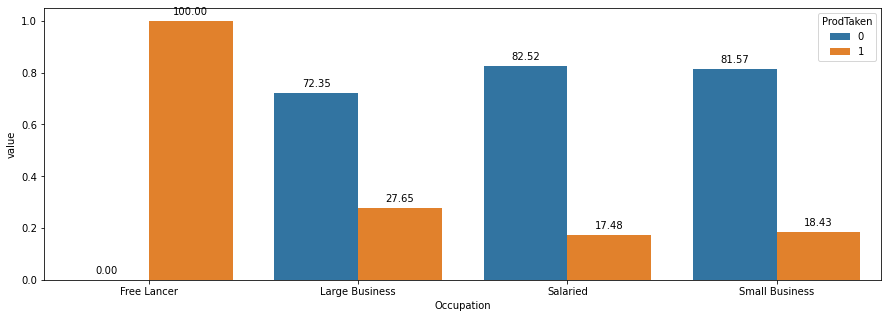

In [29]:
print( 'cross tab between Occupation and ProdTaken' )
Occupation_df = pd.crosstab(tourismDf['Occupation'],tourismDf['ProdTaken'],normalize=False)
print(Occupation_df)
print('-----------------------------------------------')
print( 'cross tab percentages between Occupation and ProdTaken' )
Occupation_df = pd.crosstab(tourismDf['Occupation'],tourismDf['ProdTaken'],normalize='index')
print(typeofContact_df)
Occupation_df = Occupation_df.stack().reset_index().rename(columns={0:'value'})   # reorganizing data to facilitate barplot. 



plt.figure(figsize=(15,5)) 
g = sns.barplot(x=Occupation_df['Occupation'],y=Occupation_df['value'],hue='ProdTaken',data=Occupation_df)
for p in g.patches:
    g.annotate(format(p.get_height()*100, '.2f'),  # print percentages on top of bar in the chart.
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    
# Insights
# All Free Lancer customers accepted Prod. 
# Higher percertage of Large business cusotmers accepted Prod.

cross tab between ProductPitched and ProdTaken
ProdTaken          0    1
ProductPitched           
Basic           1290  552
Deluxe          1528  204
King             210   20
Standard         618  124
Super Deluxe     322   20
-----------------------------------------------
cross tab percentages between ProductPitched and ProdTaken
ProdTaken              0         1
ProductPitched                    
Basic           0.700326  0.299674
Deluxe          0.882217  0.117783
King            0.913043  0.086957
Standard        0.832884  0.167116
Super Deluxe    0.941520  0.058480


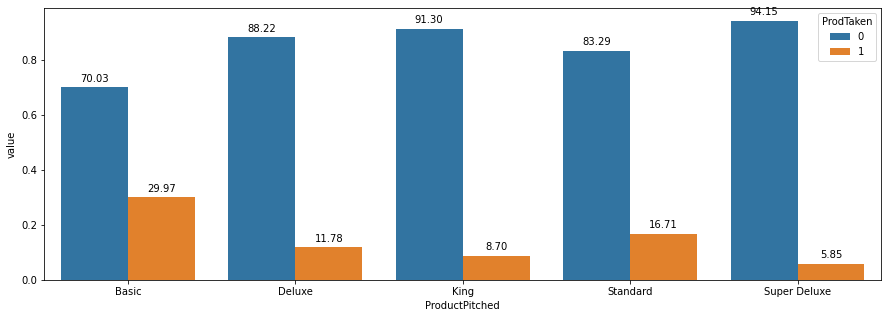

In [30]:
print( 'cross tab between ProductPitched and ProdTaken' )
ProductPitched_df = pd.crosstab(tourismDf['ProductPitched'],tourismDf['ProdTaken'],normalize=False)
print(ProductPitched_df)
print('-----------------------------------------------')
print( 'cross tab percentages between ProductPitched and ProdTaken' )
ProductPitched_df = pd.crosstab(tourismDf['ProductPitched'],tourismDf['ProdTaken'],normalize='index')
print(ProductPitched_df)
ProductPitched_df = ProductPitched_df.stack().reset_index().rename(columns={0:'value'})   # reorganizing data to facilitate barplot. 



plt.figure(figsize=(15,5)) 
g = sns.barplot(x=ProductPitched_df['ProductPitched'],y=ProductPitched_df['value'],hue='ProdTaken',data=ProductPitched_df)
for p in g.patches:
    g.annotate(format(p.get_height()*100, '.2f'),   # print percentages on top of bar in the chart.
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    
# Insights
# Higher percertage of Basic Product customers accepted Product.

cross tab between Gender and ProdTaken
ProdTaken     0    1
Gender              
Female     1630  342
Male       2338  578
-----------------------------------------------
cross tab percentages between Gender and ProdTaken
ProdTaken         0         1
Gender                       
Female     0.826572  0.173428
Male       0.801783  0.198217


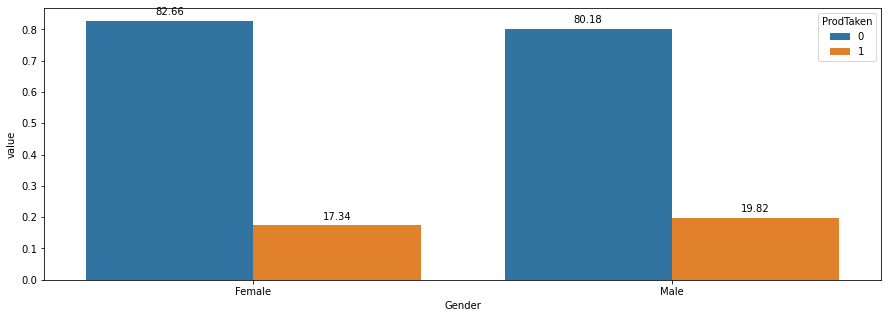

In [31]:
print( 'cross tab between Gender and ProdTaken' )
Gender_df = pd.crosstab(tourismDf['Gender'],tourismDf['ProdTaken'],normalize=False)
print(Gender_df)
print('-----------------------------------------------')
print( 'cross tab percentages between Gender and ProdTaken' )
Gender_df = pd.crosstab(tourismDf['Gender'],tourismDf['ProdTaken'],normalize='index')
print(Gender_df)
Gender_df = Gender_df.stack().reset_index().rename(columns={0:'value'})



plt.figure(figsize=(15,5)) 
g = sns.barplot(x=Gender_df['Gender'],y=Gender_df['value'],hue='ProdTaken',data=Gender_df)
for p in g.patches:
    g.annotate(format(p.get_height()*100, '.2f'),   # print percentages on top of bar in the chart.
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    
# There is no gender bias in accepting the Prod. Male and Female have same accepting trends.

cross tab between MaritalStatus and ProdTaken
ProdTaken         0    1
MaritalStatus           
Divorced        826  124
Married        2014  326
Single          612  304
Unmarried       516  166
-----------------------------------------------
cross tab percentages between MaritalStatus and ProdTaken
ProdTaken             0         1
MaritalStatus                    
Divorced       0.869474  0.130526
Married        0.860684  0.139316
Single         0.668122  0.331878
Unmarried      0.756598  0.243402


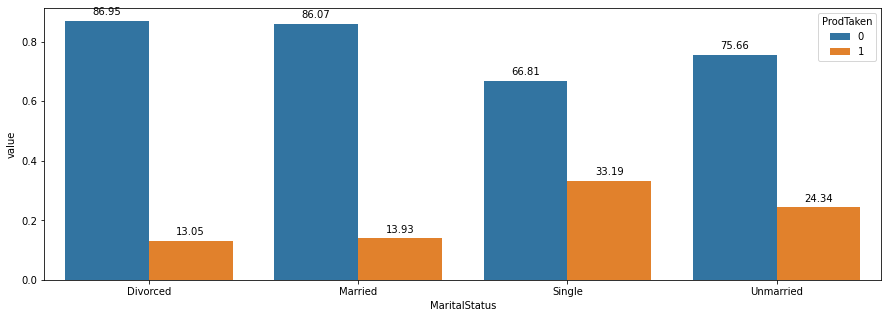

In [32]:
print( 'cross tab between MaritalStatus and ProdTaken' )
MaritalStatus_df = pd.crosstab(tourismDf['MaritalStatus'],tourismDf['ProdTaken'],normalize=False)
print(MaritalStatus_df)
print('-----------------------------------------------')
print( 'cross tab percentages between MaritalStatus and ProdTaken' )
MaritalStatus_df = pd.crosstab(tourismDf['MaritalStatus'],tourismDf['ProdTaken'],normalize='index')
print(MaritalStatus_df)
MaritalStatus_df = MaritalStatus_df.stack().reset_index().rename(columns={0:'value'})



plt.figure(figsize=(15,5)) 
g = sns.barplot(x=MaritalStatus_df['MaritalStatus'],y=MaritalStatus_df['value'],hue='ProdTaken',data=MaritalStatus_df)
for p in g.patches:
    g.annotate(format(p.get_height()*100, '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# Customers with marital status as Single have higher acceptance rate.

    
## Insights from Bivariant Graphs

1. Majority of Customer's age  who accepted the Product is around 20 - 30 yrs.
   Majority of Customer's age  who accepted the Product is around 30 - 40 yrs.
2. ProdTaken =0 and ProdTaken =1 trends behave same with DurationOfPitch.
3. Customers who have accepted the Prod have taken more number of trips.
4. Majority of customers with Monthly income between 20000 - 30000 accepted the Prod.
5. Comparitively a slight high percentage of company invited customers accepted Prod when compared to self_enquired.
6. All Free Lancer customers accepted Products. 
7. Higher percertage of Basic Product cusotmers accepted Product.
8. There is no gender bias in accepting the Prod. Male and Female have same accepting trends.
9. Customers with marital status as Single have higher acceptance rate.

## <a id = "link33"></a>Correlation Matrix

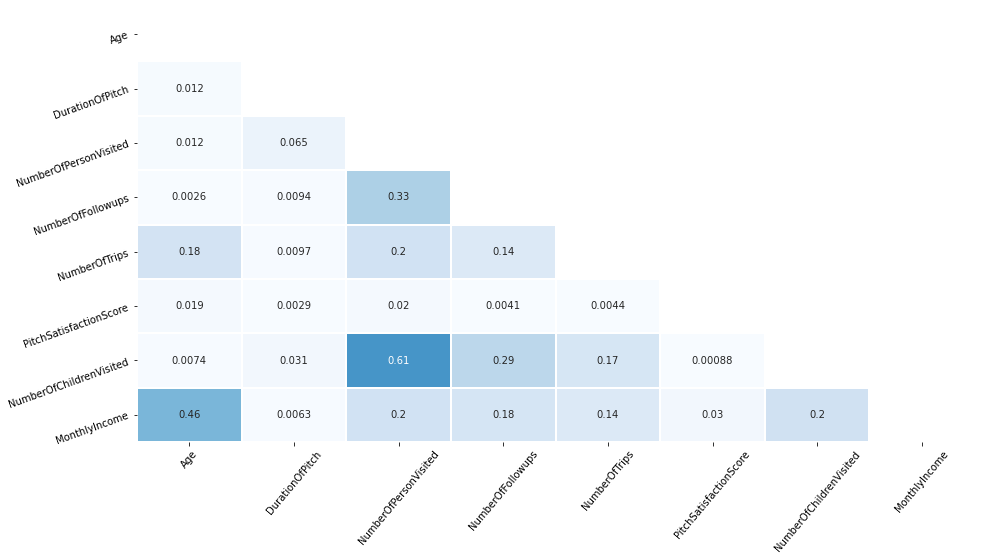

In [33]:
corr = abs(tourismDf.iloc[:,1:].corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

NumberOfChildrenVisited and NumberOfPersonsVisited has 0.61 corr. so dropping NumberOfChildrenVisited.

## <a id = "link34"></a>Customer Profile of the different packages

In [34]:
# Function to display couple of graphs that describe customer profile for given data.

def get_customer_profile(prod_cust_df):

    tot = len(prod_cust_df)

    fig, ax_list = plt.subplots(3, 3, figsize=(20,20))  # define 3*3 subplots

    g1 = sns.distplot(prod_cust_df['Age'], ax=ax_list[0,0])  # distplot in ax_list[0,0]

    g2 = sns.countplot(prod_cust_df['Occupation'], ax=ax_list[0,1]) # countplot in ax_list[0,1]
    for p in g2.patches:
        g2.annotate(format((p.get_height()/tot)*100, '.2f'),     # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    g3 = sns.countplot(prod_cust_df['MaritalStatus'], ax=ax_list[0,2])  # countplot in ax_list[0,2]
    for p in g3.patches:
        g3.annotate(format((p.get_height()/tot)*100, '.2f'),            # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    g4 = sns.countplot(prod_cust_df['Designation'], ax=ax_list[1,0])   # countplot in ax_list[1,0]
    for p in g4.patches:
        g4.annotate(format((p.get_height()/tot)*100, '.2f'),            # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
 
    g5 = sns.distplot(prod_cust_df['MonthlyIncome'], ax=ax_list[1,1])   # distplot in ax_list[1,1]


    g6 = sns.countplot(prod_cust_df['Gender'], ax=ax_list[1,2])         # countplot in ax_list[1,2]
    for p in g6.patches:
        g6.annotate(format((p.get_height()/tot)*100, '.2f'),             # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')


    g7 = sns.countplot(prod_cust_df['OwnCar'], ax=ax_list[2,0])       # countplot in ax_list[2,0]
    for p in g7.patches: 
        g7.annotate(format((p.get_height()/tot)*100, '.2f'),           # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    

    g8 = sns.countplot(prod_cust_df['Passport'], ax=ax_list[2,1])      # countplot in ax_list[2,1]
    for p in g8.patches:
        g8.annotate(format((p.get_height()/tot)*100, '.2f'),            # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    g9 = sns.countplot(prod_cust_df['ProdTaken'], ax=ax_list[2,2])     # countplot in ax_list[2,2]
    for p in g9.patches:
        g9.annotate(format((p.get_height()/tot)*100, '.2f'),            # display percentage on top of bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.show()

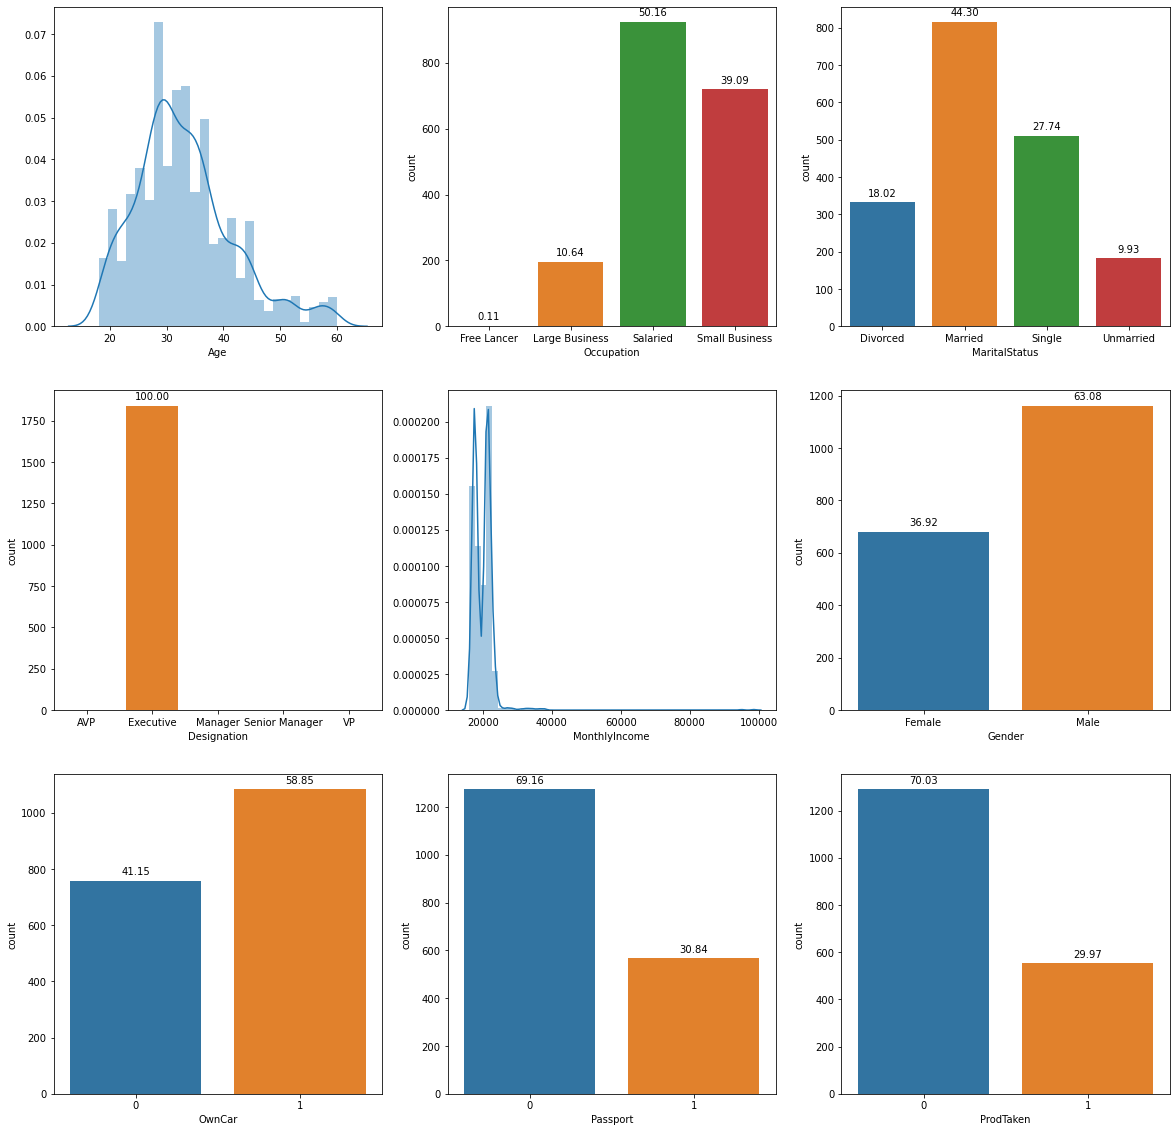

In [35]:
tourismDf_Basic = tourismDf[tourismDf['ProductPitched']=='Basic']    # filter Basic product customer data
get_customer_profile(tourismDf_Basic)   # call get_customer_profile for Basic product customer data

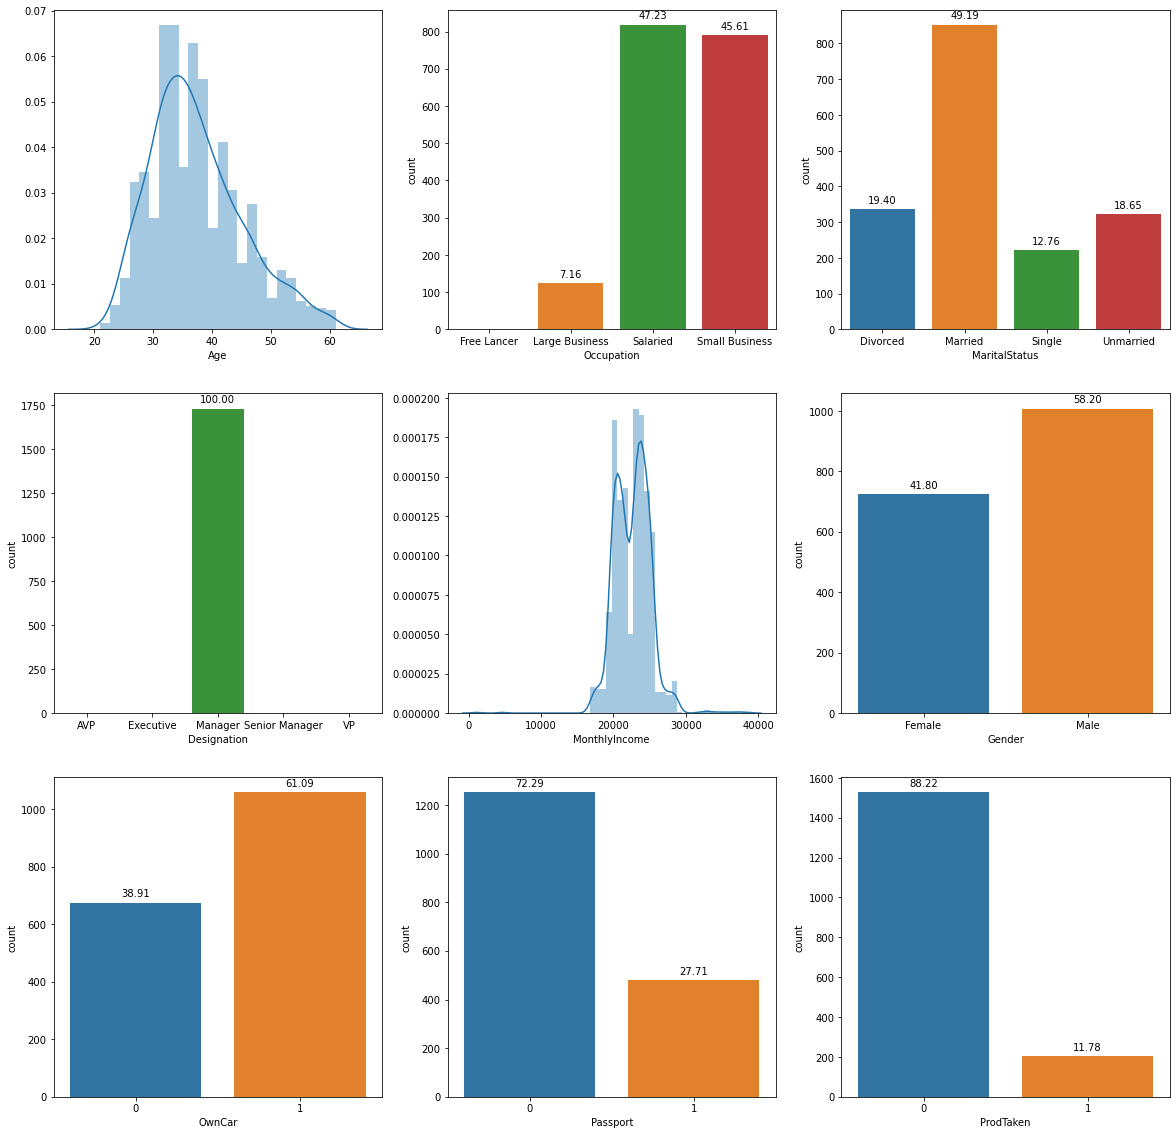

In [36]:
tourismDf_Deluxe = tourismDf[tourismDf['ProductPitched']=='Deluxe']   # filter Deluxe product customer data
get_customer_profile(tourismDf_Deluxe)      # call get_customer_profile for Deluxe product customer data

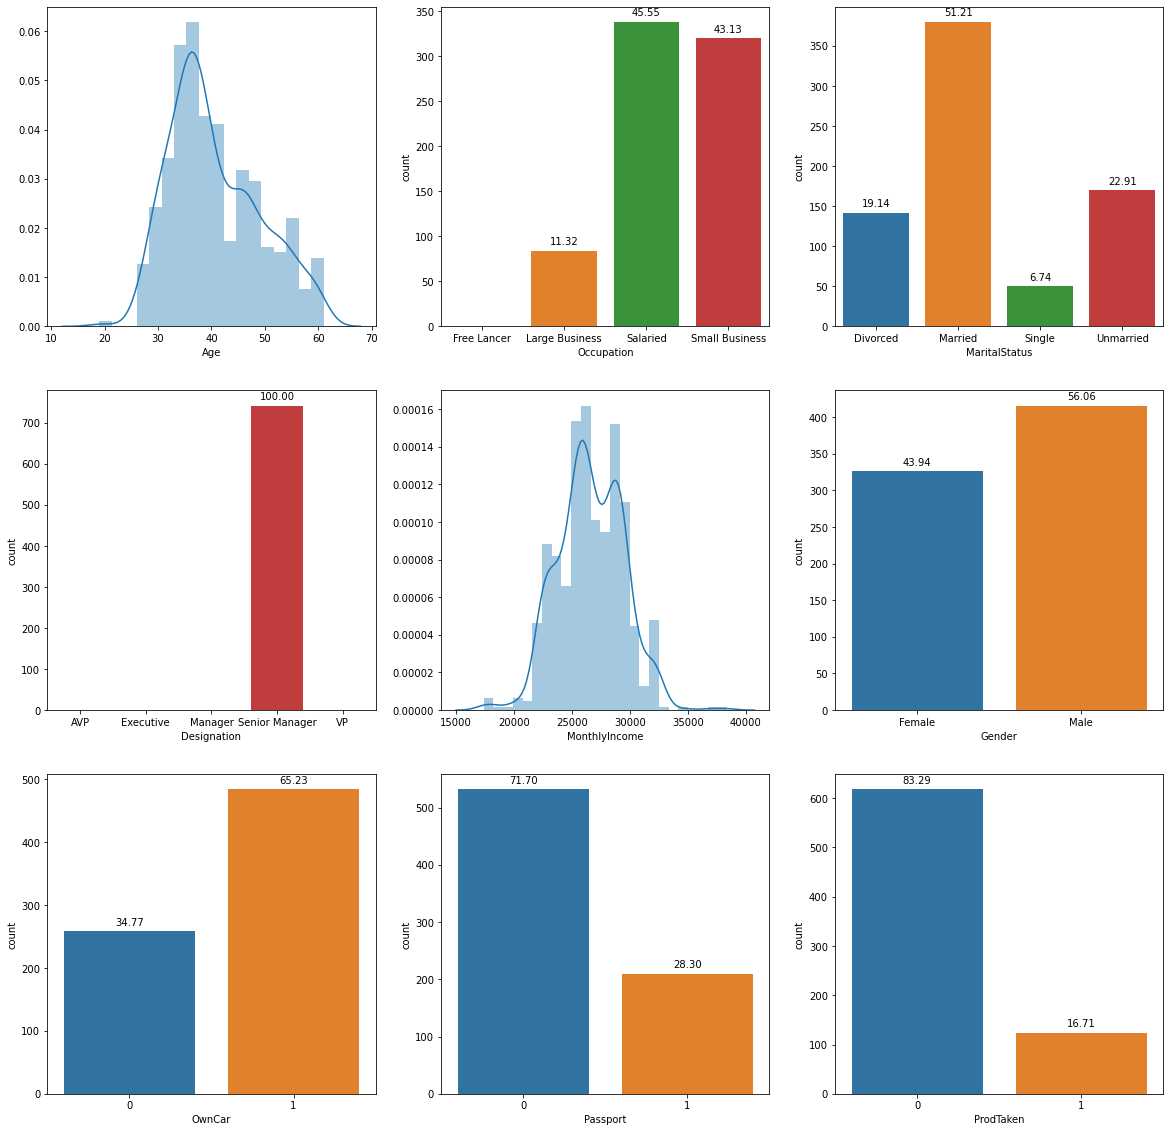

In [37]:
tourismDf_Standard = tourismDf[tourismDf['ProductPitched']=='Standard']    # filter Standard product customer data
get_customer_profile(tourismDf_Standard)         # call get_customer_profile for Standard product customer data

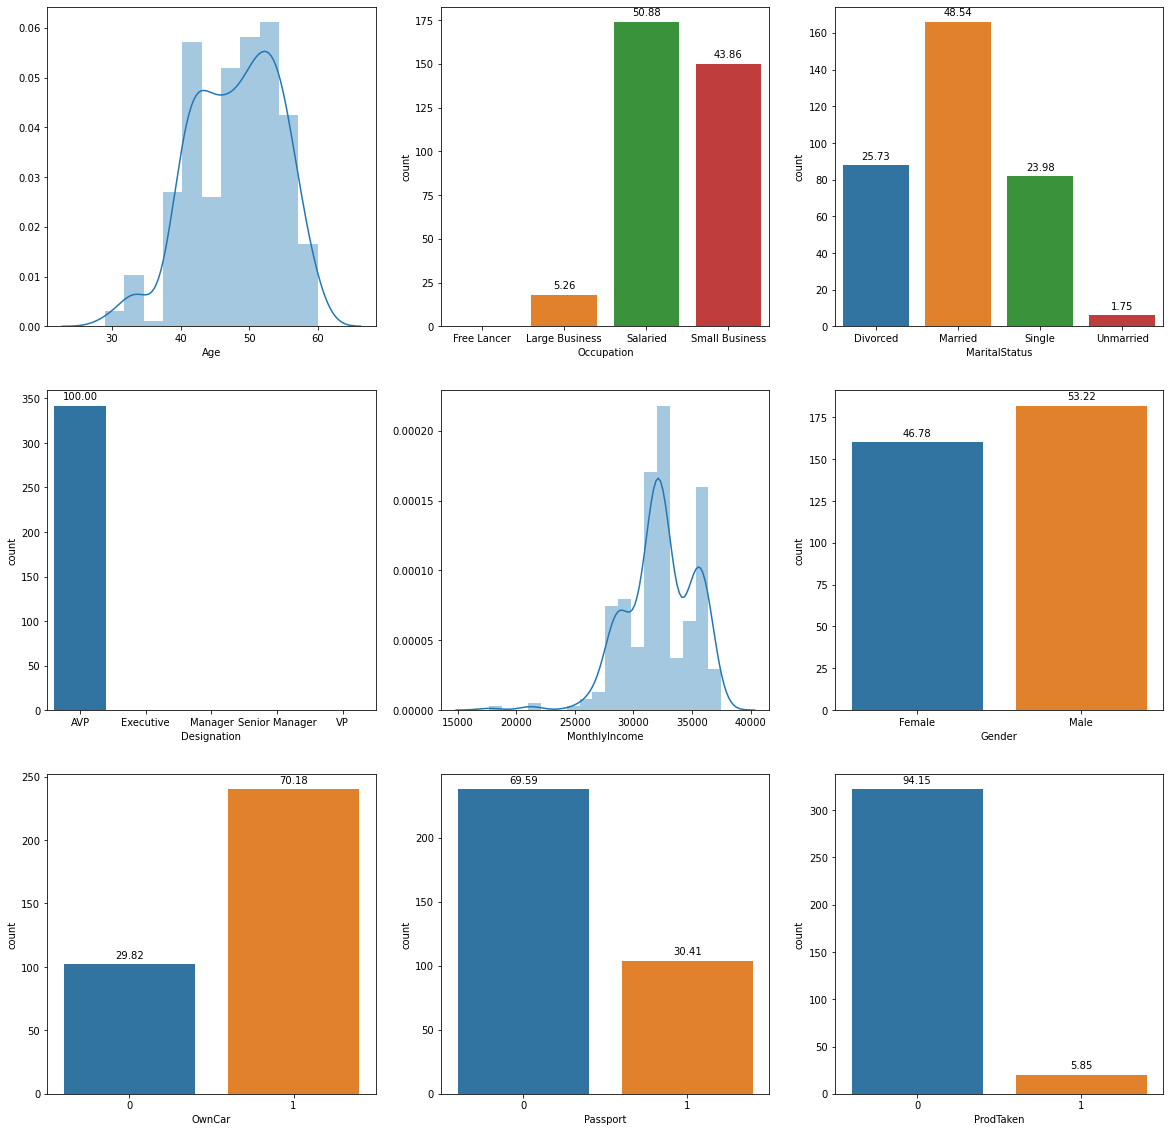

In [38]:
tourismDf_SD = tourismDf[tourismDf['ProductPitched']=='Super Deluxe']     # filter Super Deluxe product customer data
get_customer_profile(tourismDf_SD)           # call get_customer_profile for Super Deluxe product customer data     

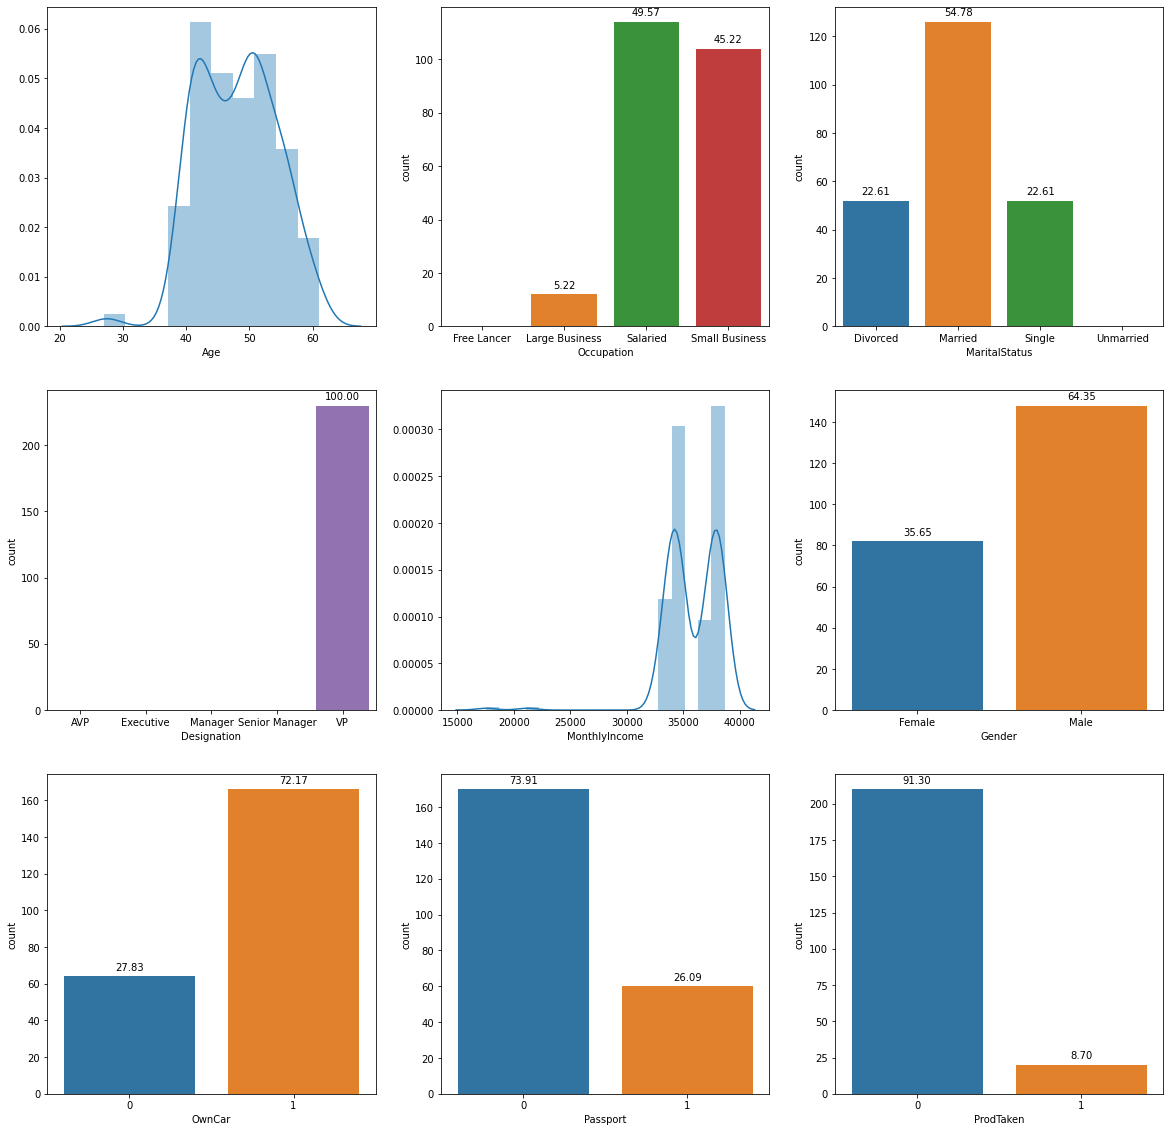

In [39]:
tourismDf_king = tourismDf[tourismDf['ProductPitched']=='King']    # filter King product customer data
get_customer_profile(tourismDf_king)   # call get_customer_profile for King product customer data     

## <a id = "link4"></a> Illustrate the insights based on EDA

**Insights from univariant graphs**

1. There are more customers who contacted on self-enquiry rather than company invited. <BR>which means advertising is reaching the audience.
2.  More number of customers came from CityTier 1.
3.  Majority of customers are Salaried people.
4.  Suprisingly most preferred property start is 3. might be people compromised quality for cost. 
5.  Married people are more among the customers.
6.  Majority of customers have no passport so travel packages can more concentrate on places with in the country.

7. Majority of customer's age is between 30 and 40 yrs.
8. Duration of pitch is left skewed. means most of pitch last for less duration that is between (0-20).
9. Majority of customers salary is between 20000  to 25000 apprx.



**Insights from bivariant graphs**

1. Majority of Customer's age  who accepted the Product is around 20 - 30 yrs.<BR>
   Majority of Customer's age  who accepted the Product is around 30 - 40 yrs.
2. ProdTaken =0 and ProdTaken =1 trends behave same with DurationOfPitch.
3. Customers who have accepted the Prod have taken more number of trips.
4. Majority of customers with Monthly income between 20000 - 30000 accepted the Prod.
5. Comparitively a slight high percentage of company invited customers accepted Prod when compared to self_enquired.
6. All Free Lancer customers accepted Products. 
7. Higher percertage of Basic Product cusotmers accepted Product.
8. There is no gender bias in accepting the Prod. Male and Female have same accepting trends.
9. Customers with marital status as Single have higher acceptance rate.

**Insights from correlation metrix**

1. NumberOfChildrenVisited and NumberOfPersonsVisited has relatively high corr. so dropping NumberOfChildrenVisited.

**Customer profile (characteristics of a customer) of the different packages**

1. Basic Product Customer profile:

    i)   Age span is between 20-60. but majority of customers are in the range 28-35 years.<BR>
    ii)  Salaried people are more intrested in Basic product.<BR>
    iii) All customers for this product have Executive designation. <BR>
    iv)  Monthly income range is between 10000 and 25000.<BR>
    v)   Majority of customers donot have passports.<BR>
    vi)  29.97 % of Basic product customers accepted the product.<BR>
    
    
2. Delux Product Customer profile:
    
    i)   Majority of customers are in the range 30-40 years.<BR>
    ii)  Salaried people and Small business customers have shown similar interest in Delux product.<BR>
    iii) All customers for this product have  Manager designation. <BR>
    iv)  Monthly income range is between 17000 and 30000.<BR>
    v)   Majority of customers donot have passports.<BR>
    vi)  11.78 % of Delux product customers accepted the product.<BR>
    

3. Standard Product Customer profile:

    i)   Age span is between 27-60. but majority of customers are in the range 30-40 years.<BR>
    ii)  Salaried people and Small business customers have shown similar interest in Standard product.<BR>
    iii) All customers for this product have Senior Manager designation. <BR>
    iv)  Monthly income range is between 15000 and 35000. Majority of customers salary is in the range 25000 and 30000.<BR>
    v)   Majority of customers donot have passports.<BR>
    vi)  16.71 % of Standard product customers accepted the product.<BR>
    

4. Super Deluxe Product Customer profile:

    i)   Majority of customer's age is in the range 40-60 years.<BR>
    ii)  Salaried people have shown more interest in Super Deluxe product.<BR>
    iii) All customers for this product have AVP designation. <BR>
    iv)  Majority customer's Monthly income range is 30000 to 35000.<BR> 
    v)   Majority of customers donot have passports.<BR>
    vi)  5.85 % of Super Deluxe product customers accepted the product.<BR>
    

5. King Product Customer profile:

    i)   Majority of customer's age is in the range 40-60 years.<BR>
    ii)  Salaried people have shown more interest in King product.<BR> 
    iii) All customers for this product have VP designation.<BR> 
    iv)  Majority customer's Monthly income range is 35000 to 40000. <BR>
    v)   Majority of customers donot have passports.<BR>
    vi)  8.70 % of Super Deluxe product customers accepted the product.<BR>

## <a id = "link5"></a> Data Pre-processing

### <a id = "link51"></a> **Outlier detection**

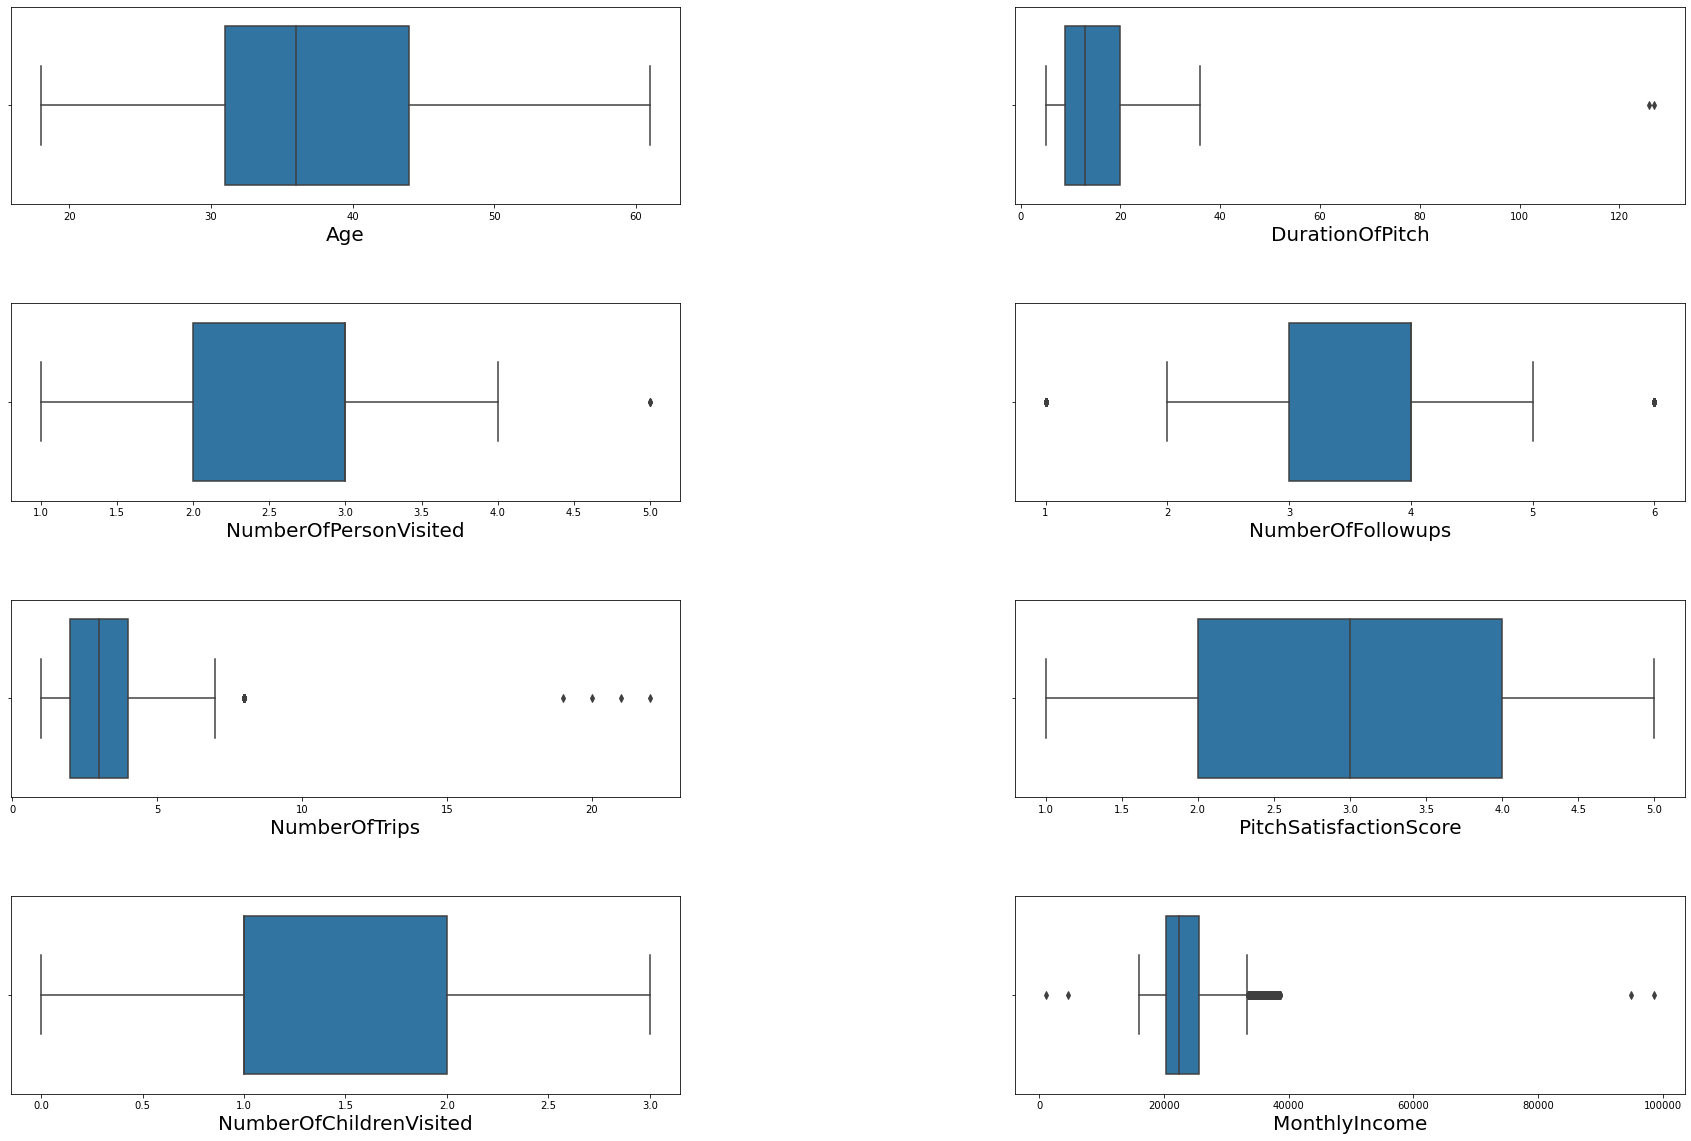

In [40]:
fig, ax_list = plt.subplots(4, 2, figsize=(30,20))  # create 4*2 subplots
fig.subplots_adjust( wspace=0.5, hspace=0.5)    # to increase distance between subplots


row,col = (0,0)
for feature in tourismDf.columns[1:]:
    if tourismDf[feature].dtype.name != 'category':   # select columns which are not category datatype
        row_count = row
        col_count = col
        g = sns.boxplot(tourismDf[feature], ax=ax_list[row_count,col_count])   # boxplot  for given feature
        g.set_xlabel(feature, fontsize = 20)    # set label 
        if(col==1):     # logic to set subplot ax for boxplot
            row = row+1
            col = 0
        else:
            col= col+1
plt.show()

        


**Insights from outlier detection**

1. Following features are showing outliers.<br>

    DurationOfPitch - Outliers towards right<br>
    NumberOfPersonVisited - Outliers towards right<br>
    NumberOfFollowups - Outliers towards right and left<br>
    NumberOfTrips - Outliers towards right<br>
    MonthlyIncome - Outliers towards right and left<br>


Outliers are not removed from the dataset.<br> 


Outliers are retained for below reasons.

 i)   Want models to learn and capture the outlier datapoints so that the edge cases in unseen data are handled.  <BR>
 ii)  Also since we are handling different models on same dataset and each model has difference effect of outliers on its results, I want to keep the outliers to compare the results. <BR>
 iii) In real time, we can confirm with the client if these outliers are valid or might have cropped up due to errors, and then remove as per client responce. Here assuming all outliers are valid, I am retaining the outlier data points in all features. <BR>



    

### <a id = "link52"></a> **Missing value Treatment**

In [41]:
tourismDf.isnull().sum().sort_values()   # display number of null values in each feature.

CustomerID                   0
ProdTaken                    0
OwnCar                       0
CityTier                     0
PitchSatisfactionScore       0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
Designation                  0
ProductPitched               0
MaritalStatus                0
Passport                     0
TypeofContact               25
PreferredPropertyStar       26
NumberOfFollowups           45
NumberOfChildrenVisited     66
NumberOfTrips              140
Age                        226
MonthlyIncome              233
DurationOfPitch            251
dtype: int64

In [42]:
print(tourismDf['TypeofContact'].value_counts())     #display value counts in TypeofContact
tourismDf[tourismDf['TypeofContact'].isnull()].head(10) # display dataframe head where TypeofContact is null

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
224,200224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,200571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,200572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,200576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,200579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,200598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,200622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,200724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,200843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,201021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


In [43]:
# Imputing null values for TypeofContact feature as 'Unknown'
tourismDf['TypeofContact'] = tourismDf['TypeofContact'].astype('string')
tourismDf['TypeofContact'].fillna('Unknown', inplace =True)
tourismDf['TypeofContact'] = tourismDf['TypeofContact'].astype('category')
print('Number of null values after imputing:',tourismDf['TypeofContact'].isnull().sum())

Number of null values after imputing: 0


In [44]:
print(tourismDf['PreferredPropertyStar'].value_counts())   # display value_counts()
print(tourismDf['PreferredPropertyStar'].isnull().sum())   # display number of null values
tourismDf[tourismDf['PreferredPropertyStar'].isnull()].head(10)  # display head of dataframe where PreferredPropertyStar is null

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
26


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,202609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,202634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,203012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,203190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,203193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,203214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,203295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,203342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,203362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [45]:
# Imputing null values for PreferredPropertyStar feature as '-1'
tourismDf['PreferredPropertyStar'] = tourismDf['PreferredPropertyStar'].astype('float')
tourismDf['PreferredPropertyStar'].fillna(-1.0, inplace =True)
tourismDf['PreferredPropertyStar'] = tourismDf['PreferredPropertyStar'].astype('category')
print(tourismDf['PreferredPropertyStar'].value_counts())
print('Number of null values after imputing:',tourismDf['PreferredPropertyStar'].isnull().sum())

 3.0    2993
 5.0     956
 4.0     913
-1.0      26
Name: PreferredPropertyStar, dtype: int64
Number of null values after imputing: 0


In [46]:
print(tourismDf['NumberOfFollowups'].value_counts())    # display value_counts
print(tourismDf['NumberOfFollowups'].isnull().sum())    # display number of null values 
tourismDf[tourismDf['NumberOfFollowups'].isnull()].head(10)  # display head of dataframe where NumberOfFollowups is null

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
45


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
79,200079,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,200094,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,200096,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,200122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,200135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,200174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,200317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,200322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,200376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,200532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


In [47]:
# Imputing null values for NumberOfFollowups feature as '-1'

tourismDf['NumberOfFollowups'].fillna(-1.0, inplace =True)
print(tourismDf['NumberOfFollowups'].value_counts())
print('Number of null values after imputing:',tourismDf['NumberOfFollowups'].isnull().sum())

 4.0    2068
 3.0    1466
 5.0     768
 2.0     229
 1.0     176
 6.0     136
-1.0      45
Name: NumberOfFollowups, dtype: int64
Number of null values after imputing: 0


In [48]:
print(tourismDf['NumberOfTrips'].value_counts())   # display value_counts()
print(tourismDf['NumberOfTrips'].isnull().sum())    # display number of null values
# Imputing null values for NumberOfFollowups feature as '-1'tourismDf[tourismDf['NumberOfTrips'].isnull()].head(10)  # display head of dataframe where NumberOfTrips is null.

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64
140


In [49]:
tourismDf['NumberOfTrips'].fillna(-1.0, inplace =True)   
print(tourismDf['NumberOfTrips'].value_counts())
print('Number of null values after imputing:',tourismDf['NumberOfTrips'].isnull().sum())

 2.0     1464
 3.0     1079
 1.0      620
 4.0      478
 5.0      458
 6.0      322
 7.0      218
-1.0      140
 8.0      105
 21.0       1
 19.0       1
 22.0       1
 20.0       1
Name: NumberOfTrips, dtype: int64
Number of null values after imputing: 0


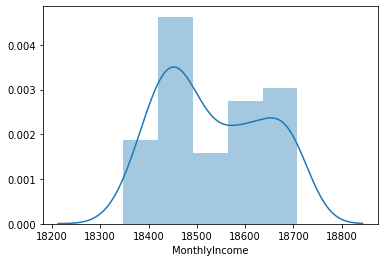

18708.0
18348.0
[nan, 20.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 44.0, 47.0, 49.0, 50.0, 52.0, 58.0]


In [50]:
# As age and monthly Income are correlated, trying to find some trend that would help to impute null values of Age with relevant value
sns.distplot(tourismDf[tourismDf['Age'].isnull()]['MonthlyIncome'])
plt.show()

# getting the Monthly Income range where Age is null
print(tourismDf[tourismDf['Age'].isnull()]['MonthlyIncome'].max())
print(tourismDf[tourismDf['Age'].isnull()]['MonthlyIncome'].min())


# get age range where Monthly Income is in the range(from above commands)
print(sorted(tourismDf[(tourismDf['MonthlyIncome']>18000.0)  &  (tourismDf['MonthlyIncome']<19000.0)]['Age'].unique()))

In [51]:
# Find the age mean  where Monthly Income  is in the range(18708.0,18348.0)
mean_impute_age = tourismDf[(tourismDf['MonthlyIncome']>18000.0)  &  (tourismDf['MonthlyIncome']<19000.0)  & (tourismDf['Age'].notnull())]['Age'].mean()

#impute null with mean_impute_age
tourismDf['Age'].fillna(mean_impute_age, inplace =True)

print("mean_impute_age:",mean_impute_age)

print('Number of null values after imputing:',tourismDf['Age'].isnull().sum())


mean_impute_age: 34.2289156626506
Number of null values after imputing: 0


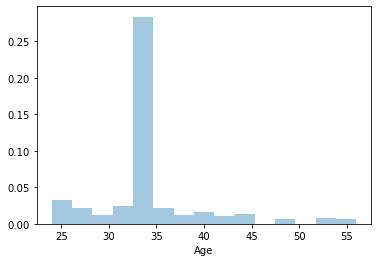

56.0
24.0
0    34.228916
dtype: float64
mean= 21522.228808535863
mode= 0    18452.0
dtype: float64
max= 36122.0
min= 16052.0


In [52]:
# As age and monthly Income are correlated, trying to find some trend that would help to impute null values of MonthlyIncome with relevant value
sns.distplot(tourismDf[tourismDf['MonthlyIncome'].isnull()]['Age'])
plt.show()


tourismDf[tourismDf['MonthlyIncome'].isnull()]['Age'].value_counts()  # number of null values in MonthlyIncome

# getting the Age range where MonthlyIncome is null
print(tourismDf[tourismDf['MonthlyIncome'].isnull()]['Age'].max())
print(tourismDf[tourismDf['MonthlyIncome'].isnull()]['Age'].min())
print(tourismDf[tourismDf['MonthlyIncome'].isnull()]['Age'].mode())


# get Monthly Income range where Age is in the range(from above commands)
print('mean=',tourismDf[(tourismDf['Age']>24)  &  (tourismDf['Age']<35)]['MonthlyIncome'].mean())
print('mode=',tourismDf[(tourismDf['Age']>24)  &  (tourismDf['Age']<35)]['MonthlyIncome'].mode())
print('max=',tourismDf[(tourismDf['Age']>24)  &  (tourismDf['Age']<35)]['MonthlyIncome'].max())
print('min=',tourismDf[(tourismDf['Age']>24)  &  (tourismDf['Age']<35)]['MonthlyIncome'].min())
                       

In [53]:
# Find the Monthly Income mean  where Age  is in the range(24,35)

mean_impute_salary = tourismDf[(tourismDf['Age']>24)  &  (tourismDf['Age']<35) & (tourismDf['MonthlyIncome'].notnull())]['MonthlyIncome'].mean()

#Impute  MonthlyIncome null values with mean_impute_salary
tourismDf['MonthlyIncome'].fillna(mean_impute_salary, inplace =True)

print('Number of null values after imputing:',tourismDf['MonthlyIncome'].isnull().sum())

Number of null values after imputing: 0


In [54]:
#DurationOfPitch
print(tourismDf['DurationOfPitch'].isnull().sum())
tourismDf[tourismDf['DurationOfPitch'].isnull()]

251


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
46,200046,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.000000
75,200075,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,21522.228809
76,200076,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,21522.228809
84,200084,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,21522.228809
103,200103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,204215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Basic,3.0,Single,3.0,0,1,0,3.0,Executive,19878.000000
4427,204427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,5,1,2.0,Executive,19687.000000
4641,204641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Basic,3.0,Single,3.0,0,1,0,2.0,Executive,19729.000000
4678,204678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,0,5,0,3.0,Executive,19730.000000


In [55]:
#Impute DurationOfPitch null values with -1.
tourismDf['DurationOfPitch'].fillna(-1.0, inplace =True)
print('Number of null values after imputing:',tourismDf['DurationOfPitch'].isnull().sum())

Number of null values after imputing: 0


### <a id = "link53"></a>Prepare data for modeling

In [56]:
# Columns which require one-Hot encoding.
oneHotCols=["TypeofContact","CityTier","Occupation","Gender","ProductPitched","PreferredPropertyStar","MaritalStatus","Designation","OwnCar","Passport"]

if(all(x in tourismDf for x in oneHotCols)):  # to avoid error on second run of the block
    tourismDf=pd.get_dummies(tourismDf, columns=oneHotCols)
else:
    pass
    



In [57]:
tourismDf.head(10)

,CustomerID,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,PreferredPropertyStar_5.0,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.000000,6.0,3,3.0,1.0,1,2,1,...,0,0,0,1,0,0,0,1,0,0
1,200001,0,49.000000,14.0,3,4.0,2.0,0,3,1,...,0,1,0,0,0,0,0,1,0,0
2,200002,1,37.000000,8.0,3,4.0,7.0,1,3,0,...,0,0,0,1,0,0,1,0,0,0
3,200003,0,33.000000,9.0,2,3.0,2.0,1,5,1,...,0,1,0,0,0,0,1,0,0,0
4,200004,0,34.228916,8.0,2,3.0,1.0,0,5,1,...,0,1,0,0,0,0,1,0,0,0
5,200005,0,32.000000,8.0,3,3.0,1.0,0,5,1,...,0,0,0,1,0,0,1,0,0,0
6,200006,0,59.000000,9.0,2,2.0,5.0,1,2,1,...,1,1,0,0,0,0,1,0,0,0
7,200007,0,30.000000,30.0,3,3.0,2.0,0,2,0,...,0,0,1,0,0,0,1,0,0,0
8,200008,0,38.000000,29.0,2,4.0,1.0,0,3,0,...,0,0,0,0,1,0,0,0,1,0
9,200009,0,36.000000,33.0,3,3.0,7.0,0,3,1,...,0,1,0,0,0,0,0,1,0,0


### <a id = "link54"></a>Feature Engineering

In [100]:
# CustomerID is removed as it is index column and has no effect on prediction feature.
# NumberOfChildrenVisited and NumberOfPersonsVisited have relatively high correlation. so dropping NumberOfChildrenVisited.
# Gender_Female is removed as presence of Gender_Male column in data gives Gender_Female information.

drop_col_list = ['CustomerID','NumberOfChildrenVisited','Gender_Female']

if(all(x in tourismDf for x in drop_col_list)):  #to avoid error on second run of the block
    tourismDf.drop(drop_col_list,axis=1,inplace=True)
else:
    pass


# remove spaces in column names
tourismDf.rename({'TypeofContact_Company Invited':'TypeofContact_CompanyInvited','TypeofContact_Self Enquiry':'TypeofContact_SelfEnquiry','Occupation_Free Lancer':'Occupation_FreeLancer','Occupation_Large Business':'Occupation_LargeBusiness','Occupation_Small Business':'Occupation_SmallBusiness','ProductPitched_Super Deluxe':'ProductPitched_SuperDeluxe','Designation_Senior Manager':'Designation_SeniorManager'},axis='columns',inplace=True)

#check if columns are removed.
print(tourismDf.columns)


print(tourismDf.dtypes)


Index(['Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'MonthlyIncome', 'TypeofContact_CompanyInvited',
       'TypeofContact_SelfEnquiry', 'TypeofContact_Unknown', 'CityTier_1',
       'CityTier_2', 'CityTier_3', 'Occupation_FreeLancer',
       'Occupation_LargeBusiness', 'Occupation_Salaried',
       'Occupation_SmallBusiness', 'Gender_Male', 'ProductPitched_Basic',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_SuperDeluxe',
       'PreferredPropertyStar_-1.0', 'PreferredPropertyStar_3.0',
       'PreferredPropertyStar_4.0', 'PreferredPropertyStar_5.0',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_SeniorManager', 'Designation_VP'],
      dtype='object')
Age      

## <a id = "link6"></a>Split the dataset

In [59]:
# stratified sampling is used to ensure that relative class frequencies are approximately preserved in train and test sets.

X = tourismDf.drop("ProdTaken" , axis=1)
y = tourismDf.pop("ProdTaken")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

## <a id = "link7"></a> Model building - Bagging

Build bagging classifier, random forest, and decision tree.

Model performance improvement - Bagging
- Comment on which metric is right for model performance evaluation and why? 
- Comment on model performance - Can model performance be improved? check and comment

In [60]:
## Function to draw confusion matrix
def draw_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : model classifier
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)  # get predictions for given test data
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])   # call confusion matrix function
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])    # define pandas df with required index and columns
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]       # calculate TP,FP,TN,FN percentages
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))   # set figure size
    sns.heatmap(df_cm, annot=labels,fmt='')   # draw heat map
    plt.ylabel('True label')       # set y label
    plt.xlabel('Predicted label')  # set x label

In [61]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def calc_metrics_score(model,flag=True):
    '''
    model : model classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### <a id = "link71"></a>Decision Tree

In [62]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

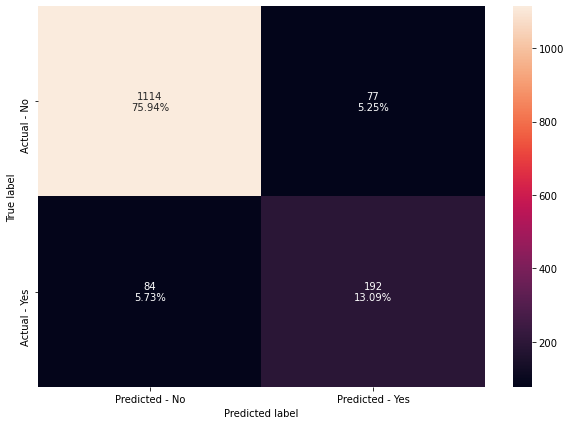

In [63]:
draw_confusion_matrix(dTree,y_test)

In [64]:
decision_tree_score = calc_metrics_score(dTree,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.8902522154055896
Recall on training set :  1.0
Recall on test set :  0.6956521739130435
Precision on training set :  1.0
Precision on test set :  0.7137546468401487


In [65]:
y.value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

**Insights from decision_tree score**

There is clear overfit of training data.<BR>
Recall can be improved.There is huge difference between traning and test results.<BR>
This model should be tuned to remove overfit.<BR>


### <a id = "link72"></a>Bagging Classifier

In [66]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

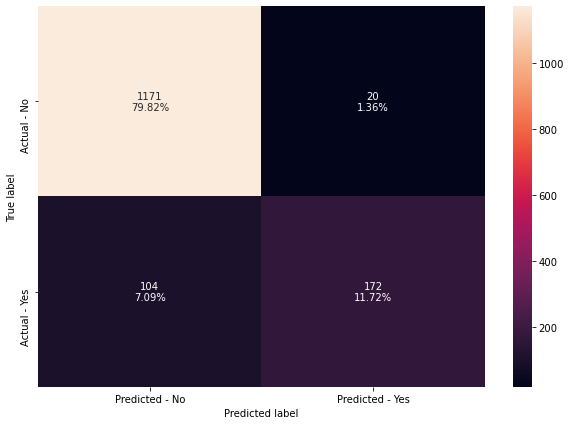

In [67]:
draw_confusion_matrix(bagging_estimator,y_test)

In [68]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=calc_metrics_score(bagging_estimator)

Accuracy on training set :  0.9956153171587255
Accuracy on test set :  0.9154737559645535
Recall on training set :  0.9782608695652174
Recall on test set :  0.6231884057971014
Precision on training set :  0.9984152139461173
Precision on test set :  0.8958333333333334


**Insights from bagging_estimator score**

i) There is still over fit of data.<BR>
ii) Even thought Accuracy metrix shows good score, since the ratio of positives to negatives in given data is highly imbalanced. Accuracy is not good metrix to consider in this case.<BR>
iii) Recall is the most appropriate matrix for this objective.There is huge difference between Recall of test data and training data. This must be rectified.<BR>

### <a id = "link73"></a>Random Forest Classifier

In [69]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

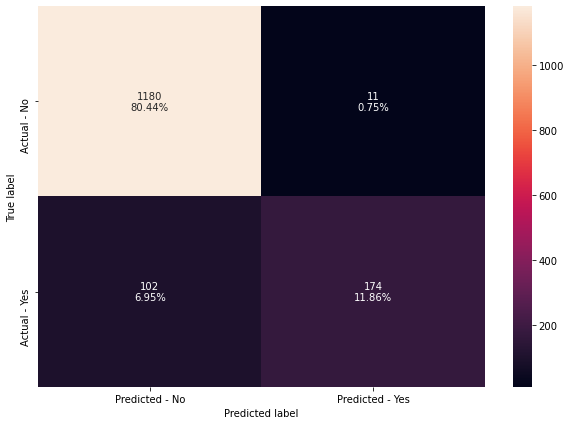

In [70]:
draw_confusion_matrix(rf_estimator,y_test)

In [71]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=calc_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9229720518064076
Recall on training set :  1.0
Recall on test set :  0.6304347826086957
Precision on training set :  1.0
Precision on test set :  0.9405405405405406


**Insights from RandomForest Score**

i) There is clear overfit of training data.<BR>
ii) Even thought Accuracy metrix shows good score, since the ratio of positives to negatives in given data is highly imbalanced. Accuracy is not good metrix to consider in this case.<BR>
iii) Huge difference between Recall of training and  test data



## <a id = "link8"></a> Model performance improvement - Bagging

### <a id = "link81"></a>which metric is right for model performance evaluation and why?

**Given Objective:**To predict which customer is more likely to purchase the newly introduced travel package.<BR>

Please find the below statements which explain the right performance evaluation metrix in this case:

i) The ratio of positives to negatives in given data is highly imbalanced. So, Accuracy is not good metrix to consider in this case.<BR>

ii) Company is looking to increase customers by finding which customers would more likely accept the product.<BR> 
They want to increase their true positives and decrease false negatives.(i.e find all potential customers who are likely to accept the product)<BR>
    so Recall is the correct metirx.<BR>
    
iii) In case company wants to reduce the advertisement cost by not wasting resources in people who are not intrested. then they have concentrate on precision.<BR>
    but getting new customers is more profitible than spending some extra money on non- intrested customers.<BR>
    so I prefer to concentrate on Recall rether than Precision in this case study.


### <a id = "link82"></a>Comments on Model performance

i) All the three models (Decision Tree, Bagging Classifier, Random Forest) are overfitting the data, 
as train accuracy and recall are much higher than the test accuracy and test recall.<BR>
    
ii)  All the three models show better score for Accuracy but <BR>
as ratio of positives to negatives are very imbalanced, accuaracy is not the suitable score for consideration.<BR>

iii) Models are better performing on true negatives(better precision scores) <BR>
i.e more accuarate in finding who donot accept the products.



### <a id = "link83"></a>Can model performance be improved?

Performance can be improved based on the following reasons:

i) Models show overfitting on training data. Meaning noise is captured.
If we can remove noise , then performance on test data improves.

ii) Since positive- negative imbalance is more. if we increase the weights of positives, we can force models to work for positives and thus recall can be improved.

iii) By hypertuning, we can get suitable parameters that can improve performance.

### <a id = "link84"></a>Model Performance Improvement

**Hyperparameter tuning of Decision Tree**

In [72]:
# Choose the type of classifier. 
dTree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

In [73]:
dTree_tuned_score=calc_metrics_score(dTree_tuned)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043
Precision on training set :  0.5405405405405406
Precision on test set :  0.6335403726708074


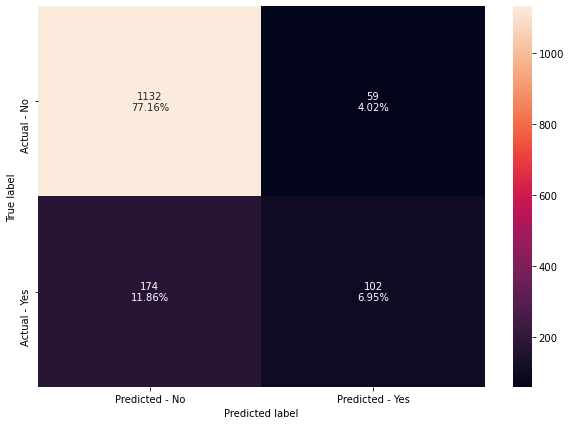

In [74]:
draw_confusion_matrix(dTree_tuned,y_test)

**Insights**

**Hypertuning of BaggingClassifier**

In [75]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.6,0.7,0.8,0.9,1], 
              'max_features': [0.6,0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,60],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)

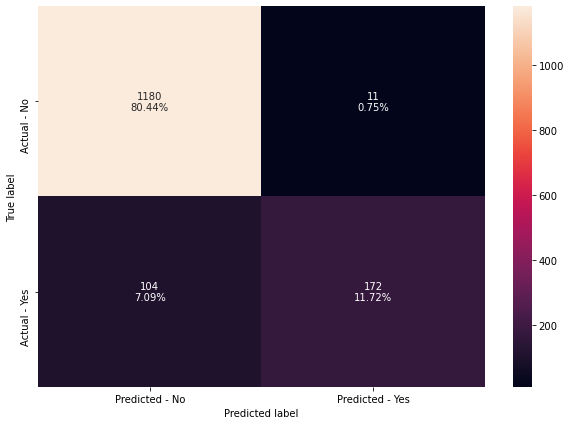

In [76]:
draw_confusion_matrix(bagging_estimator_tuned,y_test)

In [77]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=calc_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9216087252897068
Recall on training set :  0.9968944099378882
Recall on test set :  0.6231884057971014
Precision on training set :  1.0
Precision on test set :  0.9398907103825137


**Insights**

- There is not much improvement seen in the results with Hypertuning the Bagging Classfier.<BR>
Still model is overfitting on training data.<BR>

- Huge difference between training recall and test recall scores.<BR>


**Using logistic regression as the base estimator for bagging classifier**

In [78]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

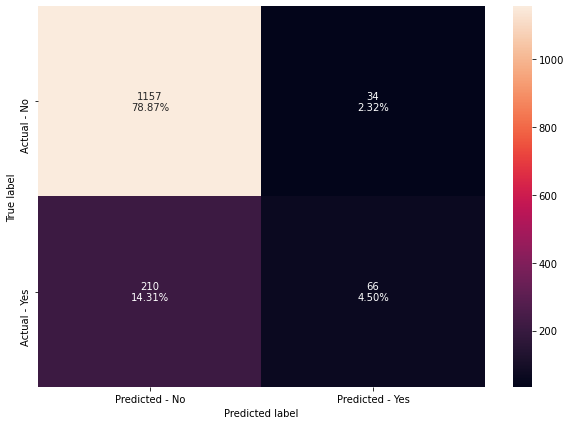

In [79]:
draw_confusion_matrix(bagging_lr,y_test)

In [80]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=calc_metrics_score(bagging_lr)

Accuracy on training set :  0.8406898567670272
Accuracy on test set :  0.8336741649625086
Recall on training set :  0.2406832298136646
Recall on test set :  0.2391304347826087
Precision on training set :  0.7345971563981043
Precision on test set :  0.66


**Insights:**

- Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall is very low.
- Recall score is very low.

**Randome Forest tuned**

In [81]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [50,100,120],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=120, random_state=1)

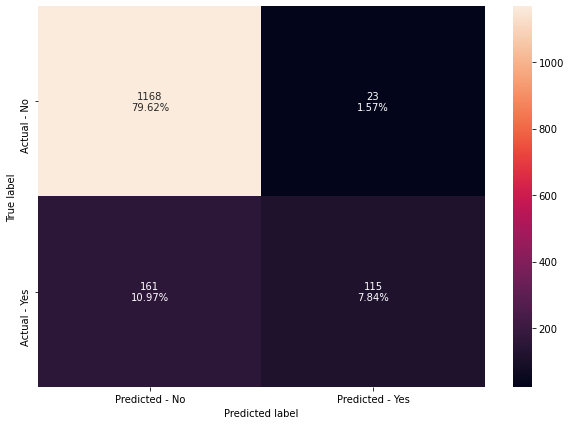

In [82]:
draw_confusion_matrix(rf_estimator_tuned,y_test)

In [83]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=calc_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9090909090909091
Accuracy on test set :  0.874573960463531
Recall on training set :  0.546583850931677
Recall on test set :  0.4166666666666667
Precision on training set :  0.9487870619946092
Precision on test set :  0.8333333333333334


**Insights**

- Overfitting of data is less than Bagging Classifier hypertuned Model.<BR>
- but still Recall score is not satisfactory.<BR>
- Accuracy even though score looks good, with the imbalance of +ve and -ve (+ve are only 18%) 87 % of Accuracy is not the good score.

**Weighted Random Forest**

In [84]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose
parameters = {
    "class_weight": [{0: 0.2, 1: 0.8}],
    "n_estimators": [50,100,150,200],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features=0.2,
                       max_samples=0.6000000000000001, min_samples_leaf=8,
                       n_estimators=50, random_state=1)

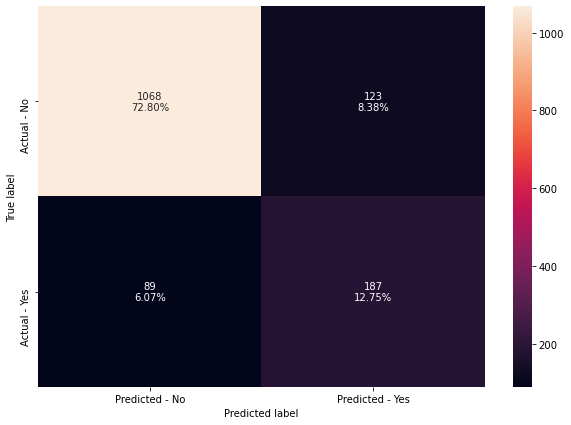

In [85]:
draw_confusion_matrix(rf_estimator_weighted,y_test)

In [86]:
rf_estimator_weighted_score=calc_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8880444314527915
Accuracy on test set :  0.8554873892297206
Recall on training set :  0.8105590062111802
Recall on test set :  0.677536231884058
Precision on training set :  0.6666666666666666
Precision on test set :  0.603225806451613


**Insights**

- Overfitting of data has reduced than Bagging Classifier hypertuned Model.<BR>
- Recall test score has increased significantly when compared to other models.<BR>
- Accuracy score is not satisfactory due to imbalanced +ve,-ve in the data.
    
  rf_estimator_weighted_score model looks better than other models till now because of below reasons:<BR>
    i) overfitting is reduced<BR>
    ii) Recall shows good score


**Feature importance**

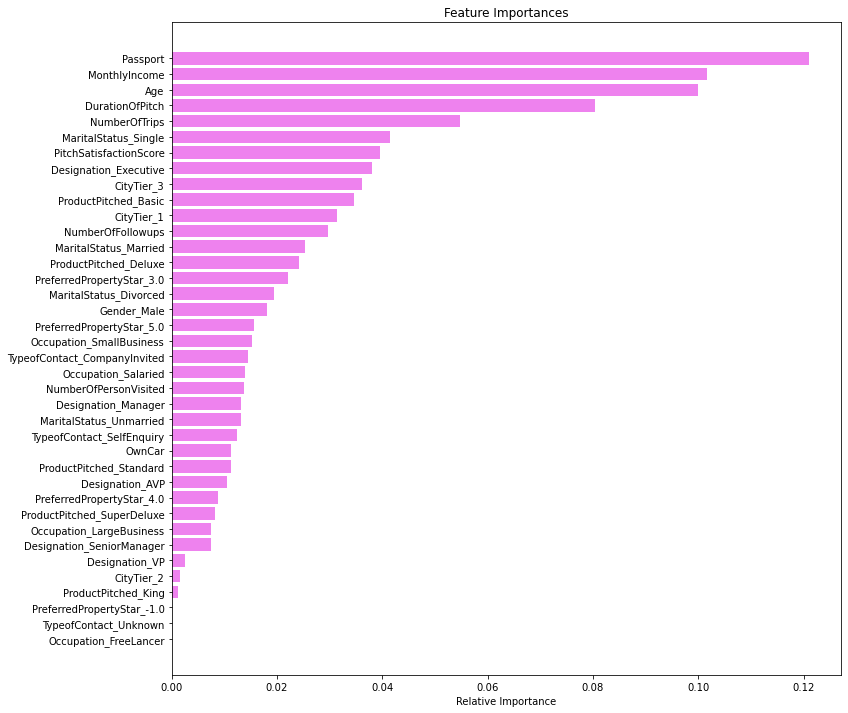

In [87]:
# Display feature importance in horizontal bar chart

importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing all models till now

In [88]:
# defining list of models
models = [dTree, dTree_tuned, bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = calc_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [89]:
comparison_bagging_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_bagging_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.00,0.89,1.00,0.70,1.00,0.71
1,Tuned Decision Tree,0.82,0.84,0.34,0.37,0.54,0.63
2,Bagging classifier with default parameters,1.00,0.92,0.98,0.62,1.00,0.90
3,Tuned Bagging Classifier,1.00,0.92,1.00,0.62,1.00,0.94
4,Bagging classifier with base_estimator=LR,0.84,0.83,0.24,0.24,0.73,0.66
5,Random Forest with deafult parameters,1.00,0.92,1.00,0.63,1.00,0.94
6,Tuned Random Forest Classifier,0.91,0.87,0.55,0.42,0.95,0.83
7,Random Forest with class_weights,0.89,0.86,0.81,0.68,0.67,0.60


## <a id = "link9"></a> Model building - Boosting

### <a id = "link91"></a>Adaboost Classifier

In [90]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

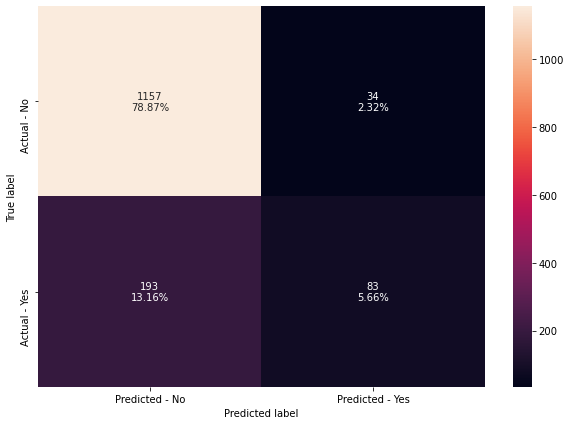

In [91]:
draw_confusion_matrix(abc,y_test)

In [92]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=calc_metrics_score(abc)

Accuracy on training set :  0.8471207249342297
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.3198757763975155
Recall on test set :  0.3007246376811594
Precision on training set :  0.7079037800687286
Precision on test set :  0.7094017094017094


**Insights**

Looks like model has less overfitting of traning data.<BR>
One good sign is that scores of training and test data for all metrics are near close . which means less noise is captured.<BR>
But the Recall score is still less and not satisfactory.



### <a id = "link92"></a>Gradient boost Classifier

In [94]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

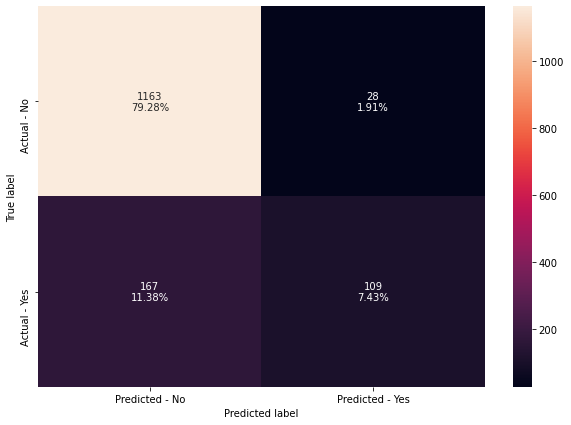

In [95]:
draw_confusion_matrix(gbc,y_test)

In [96]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=calc_metrics_score(gbc)

Accuracy on training set :  0.8851213095586086
Accuracy on test set :  0.8670756646216768
Recall on training set :  0.44254658385093165
Recall on test set :  0.39492753623188404
Precision on training set :  0.8934169278996865
Precision on test set :  0.7956204379562044


**Insights**

Looks like model has less overfitting of traning data.<BR>
Recall score is still less and not satisfactory.

### <a id = "link93"></a>XGBoost Classifier

In [99]:
X_train.dtypes

#xgb = XGBClassifier(random_state=1)
#xgb.fit(X_train,y_train)

Age                              float64
DurationOfPitch                  float64
NumberOfPersonVisited              int64
NumberOfFollowups                float64
NumberOfTrips                    float64
Passport                        category
PitchSatisfactionScore             int64
OwnCar                          category
MonthlyIncome                    float64
TypeofContact_CompanyInvited       uint8
TypeofContact_SelfEnquiry          uint8
TypeofContact_Unknown              uint8
CityTier_1                         uint8
CityTier_2                         uint8
CityTier_3                         uint8
Occupation_FreeLancer              uint8
Occupation_LargeBusiness           uint8
Occupation_Salaried                uint8
Occupation_SmallBusiness           uint8
Gender_Male                        uint8
ProductPitched_Basic               uint8
ProductPitched_Deluxe              uint8
ProductPitched_King                uint8
ProductPitched_Standard            uint8
ProductPitched_S

In [ ]:
draw_confusion_matrix(xgb,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=calc_metrics_score(xgb)

## Key points from Description

Extracts from the description which lead me towards my conclusion

i) <i>"The Policy Maker of the company wants to enable and establish a <B> viable business model to expand the customer base. </B>"</i>

ii) <i>"However, this time company wants to harness the available data of existing and potential customers <B> to make the marketing expenditure more efficient.</B>"</i>

So from the above excerpts from the description, I feel there is more concentration on making efficient spending of marketing expenditure.

which means by using required ML model, of all the predicted customers who are likely to buy package,if most of them actually buy the package , then the objective is reached.

i.e we need to maximize the true positives among the total true predictions , then the 


if we are able to predict majority of customers who are  more likely to purchase travel package, then 

